<a href="https://colab.research.google.com/github/antonioyoma/CursoGit/blob/main/entrenamiento_modelo_deteccion_vehiculos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Fri Dec  8 01:13:50 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   68C    P8    11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 659.4/659.4 kB 10.4 MB/s eta 0:00:00


In [3]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="woNPwU0Y6wQi3onH50Ec")
project = rf.workspace("roboflow-100").project("vehicles-q0x2v")
dataset = project.version(2).download("yolov8")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.5/68.5 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 21.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.6/77.6 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 8.0 MB/s eta 0:00:00
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uninstalling pyparsing-3.1.1:
      Successfully uninstalled pyparsing-3.1.1
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.8.1.78
    Uninstalling opencv-python-headless-4.8.1.78:
      Successfully uninsta

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.0.223, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to vehicles-2 in yolov8:: 100%|██████████| 8128/8128 [00:01<00:00, 6841.61it/s]


In [4]:
import os
from ultralytics import YOLO

# Load a model
model = YOLO("yolov8x.yaml")  # build a new model from scratch


                   from  n    params  module                                       arguments                     
  0                  -1  1      2320  ultralytics.nn.modules.conv.Conv             [3, 80, 3, 2]                 
  1                  -1  1    115520  ultralytics.nn.modules.conv.Conv             [80, 160, 3, 2]               
  2                  -1  3    436800  ultralytics.nn.modules.block.C2f             [160, 160, 3, True]           
  3                  -1  1    461440  ultralytics.nn.modules.conv.Conv             [160, 320, 3, 2]              
  4                  -1  6   3281920  ultralytics.nn.modules.block.C2f             [320, 320, 6, True]           
  5                  -1  1   1844480  ultralytics.nn.modules.conv.Conv             [320, 640, 3, 2]              
  6                  -1  6  13117440  ultralytics.nn.modules.block.C2f             [640, 640, 6, True]           
  7                  -1  1   3687680  ultralytics.nn.modules.conv.Conv             [640

In [5]:
# Use the model
model.train(data="/content/vehicles-2/data.yaml", epochs=50)

Ultralytics YOLOv8.0.223 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8x.yaml, data=/content/vehicles-2/data.yaml, epochs=50, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=None, format=t

100%|██████████| 755k/755k [00:00<00:00, 12.7MB/s]


Overriding model.yaml nc=80 with nc=12

                   from  n    params  module                                       arguments                     
  0                  -1  1      2320  ultralytics.nn.modules.conv.Conv             [3, 80, 3, 2]                 
  1                  -1  1    115520  ultralytics.nn.modules.conv.Conv             [80, 160, 3, 2]               
  2                  -1  3    436800  ultralytics.nn.modules.block.C2f             [160, 160, 3, True]           
  3                  -1  1    461440  ultralytics.nn.modules.conv.Conv             [160, 320, 3, 2]              
  4                  -1  6   3281920  ultralytics.nn.modules.block.C2f             [320, 320, 6, True]           
  5                  -1  1   1844480  ultralytics.nn.modules.conv.Conv             [320, 640, 3, 2]              
  6                  -1  6  13117440  ultralytics.nn.modules.block.C2f             [640, 640, 6, True]           
  7                  -1  1   3687680  ultralytic

100%|██████████| 6.23M/6.23M [00:00<00:00, 57.8MB/s]


AMP: checks passed ✅


train: Scanning /content/vehicles-2/train/labels... 2634 images, 1 backgrounds, 0 corrupt: 100%|██████████| 2634/2634 [00:01<00:00, 1558.11it/s]

train: WARNING ⚠️ /content/vehicles-2/train/images/adit_mp4-1357_jpg.rf.2f4228b88eed2a385c26be2238d05d8e.jpg: 2 duplicate labels removed


train: New cache created: /content/vehicles-2/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/vehicles-2/valid/labels... 966 images, 3 backgrounds, 0 corrupt: 100%|██████████| 966/966 [00:01<00:00, 744.42it/s]


val: New cache created: /content/vehicles-2/valid/labels.cache
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000625, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      13.5G      3.105      3.323      3.133        224        640: 100%|██████████| 165/165 [03:33<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:25<00:00,  1.20it/s]

                   all        966      13450      0.411      0.145     0.0965     0.0444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      14.1G      1.804      1.746      1.715        196        640: 100%|██████████| 165/165 [03:25<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:24<00:00,  1.27it/s]


                   all        966      13450      0.418      0.276      0.184     0.0993

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50        14G      1.639        1.5      1.514        231        640: 100%|██████████| 165/165 [03:24<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:23<00:00,  1.29it/s]


                   all        966      13450      0.394       0.34      0.255      0.147

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      14.2G      1.496       1.34      1.402        197        640: 100%|██████████| 165/165 [03:23<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:24<00:00,  1.28it/s]


                   all        966      13450      0.389      0.352      0.311      0.186

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      14.1G      1.427       1.22      1.352        231        640: 100%|██████████| 165/165 [03:24<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:24<00:00,  1.28it/s]


                   all        966      13450      0.479      0.373      0.335      0.209

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      14.1G      1.387      1.145      1.324        235        640: 100%|██████████| 165/165 [03:24<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:24<00:00,  1.28it/s]


                   all        966      13450      0.408      0.404      0.343      0.217

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50        14G      1.338      1.071      1.289        191        640: 100%|██████████| 165/165 [03:24<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:24<00:00,  1.28it/s]


                   all        966      13450      0.357      0.401      0.356      0.223

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      14.2G      1.309      1.018      1.265        136        640: 100%|██████████| 165/165 [03:24<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:24<00:00,  1.28it/s]


                   all        966      13450      0.368      0.461      0.367      0.233

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      14.1G      1.293     0.9756      1.264        151        640: 100%|██████████| 165/165 [03:24<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:24<00:00,  1.28it/s]


                   all        966      13450      0.355      0.485      0.355      0.223

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50        14G       1.26     0.9306      1.239        218        640: 100%|██████████| 165/165 [03:24<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:24<00:00,  1.27it/s]


                   all        966      13450      0.374      0.445       0.38      0.243

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      14.1G      1.253     0.8984      1.233        357        640: 100%|██████████| 165/165 [03:24<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:24<00:00,  1.28it/s]


                   all        966      13450      0.382      0.494      0.384      0.251

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      14.1G      1.237     0.8743      1.223        174        640: 100%|██████████| 165/165 [03:24<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:24<00:00,  1.29it/s]


                   all        966      13450      0.359      0.466       0.33      0.215

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50        14G      1.235     0.8558      1.227        244        640: 100%|██████████| 165/165 [03:24<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:24<00:00,  1.28it/s]


                   all        966      13450      0.388      0.496      0.384      0.255

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      14.1G      1.211     0.8304      1.209        220        640: 100%|██████████| 165/165 [03:24<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:24<00:00,  1.29it/s]


                   all        966      13450      0.442      0.538      0.399       0.27

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      14.1G      1.196     0.8071        1.2        190        640: 100%|██████████| 165/165 [03:24<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:24<00:00,  1.28it/s]

                   all        966      13450      0.391       0.52      0.401      0.269



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      14.1G      1.182     0.7835      1.184        274        640: 100%|██████████| 165/165 [03:23<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:23<00:00,  1.30it/s]


                   all        966      13450      0.462      0.564      0.437      0.295

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      14.1G      1.172     0.7712      1.188        187        640: 100%|██████████| 165/165 [03:24<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:23<00:00,  1.30it/s]


                   all        966      13450      0.474      0.534       0.43      0.286

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      14.1G       1.16     0.7521      1.185        230        640: 100%|██████████| 165/165 [03:24<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:24<00:00,  1.28it/s]


                   all        966      13450      0.471      0.516      0.415       0.28

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      14.1G      1.148     0.7288      1.167        227        640: 100%|██████████| 165/165 [03:23<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:24<00:00,  1.28it/s]


                   all        966      13450       0.47       0.54      0.423      0.289

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      14.2G      1.148     0.7334      1.172        177        640: 100%|██████████| 165/165 [03:23<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:23<00:00,  1.30it/s]

                   all        966      13450      0.447      0.577      0.423      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50        14G      1.134     0.7077      1.161        200        640: 100%|██████████| 165/165 [03:23<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:23<00:00,  1.29it/s]


                   all        966      13450      0.435      0.577      0.414      0.283

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50        14G      1.126     0.6988      1.163        207        640: 100%|██████████| 165/165 [03:23<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:24<00:00,  1.29it/s]


                   all        966      13450      0.495      0.551      0.445      0.309

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      14.1G       1.12     0.6867      1.155        166        640: 100%|██████████| 165/165 [03:23<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:24<00:00,  1.29it/s]


                   all        966      13450      0.454      0.534        0.4      0.277

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      14.2G      1.112     0.6719      1.153        228        640: 100%|██████████| 165/165 [03:24<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:23<00:00,  1.30it/s]


                   all        966      13450      0.478       0.56      0.433      0.302

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      14.1G      1.091     0.6599      1.144        212        640: 100%|██████████| 165/165 [03:23<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:24<00:00,  1.28it/s]


                   all        966      13450      0.483      0.567      0.441      0.304

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50        14G      1.094     0.6564      1.143        185        640: 100%|██████████| 165/165 [03:23<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:24<00:00,  1.29it/s]


                   all        966      13450      0.493       0.51      0.397      0.276

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      14.1G      1.084     0.6547      1.138        291        640: 100%|██████████| 165/165 [03:24<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:24<00:00,  1.29it/s]


                   all        966      13450      0.461       0.57      0.423      0.294

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      14.1G      1.078     0.6496      1.135        212        640: 100%|██████████| 165/165 [03:24<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:23<00:00,  1.30it/s]


                   all        966      13450      0.483      0.542      0.451      0.316

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50        14G      1.073     0.6343      1.134        144        640: 100%|██████████| 165/165 [03:24<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:24<00:00,  1.29it/s]


                   all        966      13450      0.481      0.584      0.445       0.31

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50        14G      1.056     0.6153      1.122        203        640: 100%|██████████| 165/165 [03:23<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:24<00:00,  1.29it/s]


                   all        966      13450      0.488      0.576      0.442      0.311

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      14.2G      1.078     0.6221      1.134        233        640: 100%|██████████| 165/165 [03:24<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:24<00:00,  1.27it/s]


                   all        966      13450       0.48      0.585      0.434      0.307

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50        14G      1.054     0.6067      1.118        183        640: 100%|██████████| 165/165 [03:23<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:23<00:00,  1.29it/s]


                   all        966      13450      0.488      0.585      0.437      0.309

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      14.1G      1.041     0.6076      1.118        262        640: 100%|██████████| 165/165 [03:23<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:23<00:00,  1.31it/s]


                   all        966      13450      0.478      0.596      0.447      0.318

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50        14G      1.034     0.5941      1.105        239        640: 100%|██████████| 165/165 [03:24<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:23<00:00,  1.30it/s]


                   all        966      13450      0.504      0.547      0.431      0.307

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      14.1G      1.039      0.591       1.11        129        640: 100%|██████████| 165/165 [03:23<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:24<00:00,  1.29it/s]


                   all        966      13450      0.509      0.575      0.453      0.321

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      14.2G      1.029     0.5827      1.105        230        640: 100%|██████████| 165/165 [03:24<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:23<00:00,  1.30it/s]


                   all        966      13450      0.497      0.594      0.445      0.317

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50        14G      1.029     0.5802      1.109        187        640: 100%|██████████| 165/165 [03:24<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:24<00:00,  1.28it/s]

                   all        966      13450      0.515      0.583      0.433      0.307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50        14G      1.007     0.5638      1.096        206        640: 100%|██████████| 165/165 [03:24<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:24<00:00,  1.29it/s]


                   all        966      13450      0.533      0.572      0.474      0.336

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      14.1G      1.008     0.5684      1.094        208        640: 100%|██████████| 165/165 [03:24<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:23<00:00,  1.29it/s]


                   all        966      13450      0.507      0.603      0.453      0.322

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      14.2G      1.001     0.5554      1.095        159        640: 100%|██████████| 165/165 [03:24<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:24<00:00,  1.28it/s]

                   all        966      13450      0.474       0.61      0.444      0.316


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      14.1G     0.9957     0.5241      1.115        105        640: 100%|██████████| 165/165 [03:26<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:24<00:00,  1.29it/s]


                   all        966      13450      0.486      0.608      0.458      0.328

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      14.1G      0.986     0.5125      1.111         90        640: 100%|██████████| 165/165 [03:22<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:24<00:00,  1.29it/s]


                   all        966      13450      0.494      0.597      0.447      0.321

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      14.1G     0.9784     0.5025      1.107        140        640: 100%|██████████| 165/165 [03:22<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:24<00:00,  1.28it/s]

                   all        966      13450       0.49      0.631       0.46      0.328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      14.1G     0.9659     0.4949      1.097        100        640: 100%|██████████| 165/165 [03:22<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:23<00:00,  1.29it/s]

                   all        966      13450      0.508      0.591      0.441      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      14.1G     0.9574     0.4908      1.094        146        640: 100%|██████████| 165/165 [03:22<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:24<00:00,  1.28it/s]


                   all        966      13450      0.512      0.614      0.449      0.322

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      14.1G     0.9503     0.4843      1.089        124        640: 100%|██████████| 165/165 [03:22<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:23<00:00,  1.30it/s]

                   all        966      13450      0.507      0.604      0.452      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      14.2G     0.9433     0.4751      1.087        157        640: 100%|██████████| 165/165 [03:23<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:24<00:00,  1.29it/s]

                   all        966      13450      0.504      0.614      0.451      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      14.2G     0.9405     0.4707      1.089        137        640: 100%|██████████| 165/165 [03:23<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:24<00:00,  1.25it/s]

                   all        966      13450      0.509      0.609      0.448      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      14.1G     0.9316     0.4678       1.08        118        640: 100%|██████████| 165/165 [03:24<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:24<00:00,  1.29it/s]


                   all        966      13450      0.503      0.623      0.458       0.33

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      14.2G     0.9261     0.4611      1.079        122        640: 100%|██████████| 165/165 [03:23<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:23<00:00,  1.30it/s]


                   all        966      13450       0.52      0.609      0.454      0.328

50 epochs completed in 3.402 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 136.7MB
Optimizer stripped from runs/detect/train/weights/best.pt, 136.7MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.0.223 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8x summary (fused): 268 layers, 68135124 parameters, 0 gradients, 257.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:31<00:00,  1.02s/it]


                   all        966      13450      0.533      0.572      0.474      0.336
               big bus        966        273      0.831      0.399      0.739      0.555
             big truck        966       1162      0.842      0.478       0.69      0.448
                bus-l-        966          8     0.0561      0.875      0.059     0.0228
                bus-s-        966         12       0.28       0.75      0.293      0.232
                   car        966       8537      0.888      0.709       0.84      0.531
             mid truck        966        257      0.746      0.405      0.447      0.341
             small bus        966         49      0.202      0.201      0.144     0.0789
           small truck        966       1721      0.726      0.521      0.631      0.415
              truck-l-        966        433      0.521       0.66      0.533      0.412
              truck-m-        966        629      0.408      0.674      0.404      0.316
              truck-s

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7b6b15d0fa00>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,  

In [6]:
import shutil

# Ruta de la carpeta que deseas descargar
carpeta_a_descargar = '/content/runs'

# Ruta y nombre del archivo comprimido que se creará
archivo_zip = '/content/runs.zip'

# Comprimir la carpeta en un archivo zip
shutil.make_archive(archivo_zip, 'zip', carpeta_a_descargar)

# Mover el archivo zip al directorio /content
shutil.move(archivo_zip + '.zip', archivo_zip)


'/content/runs.zip'

In [7]:
from google.colab import files

# Descargar el archivo zip
files.download(archivo_zip)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Matriz de confusión

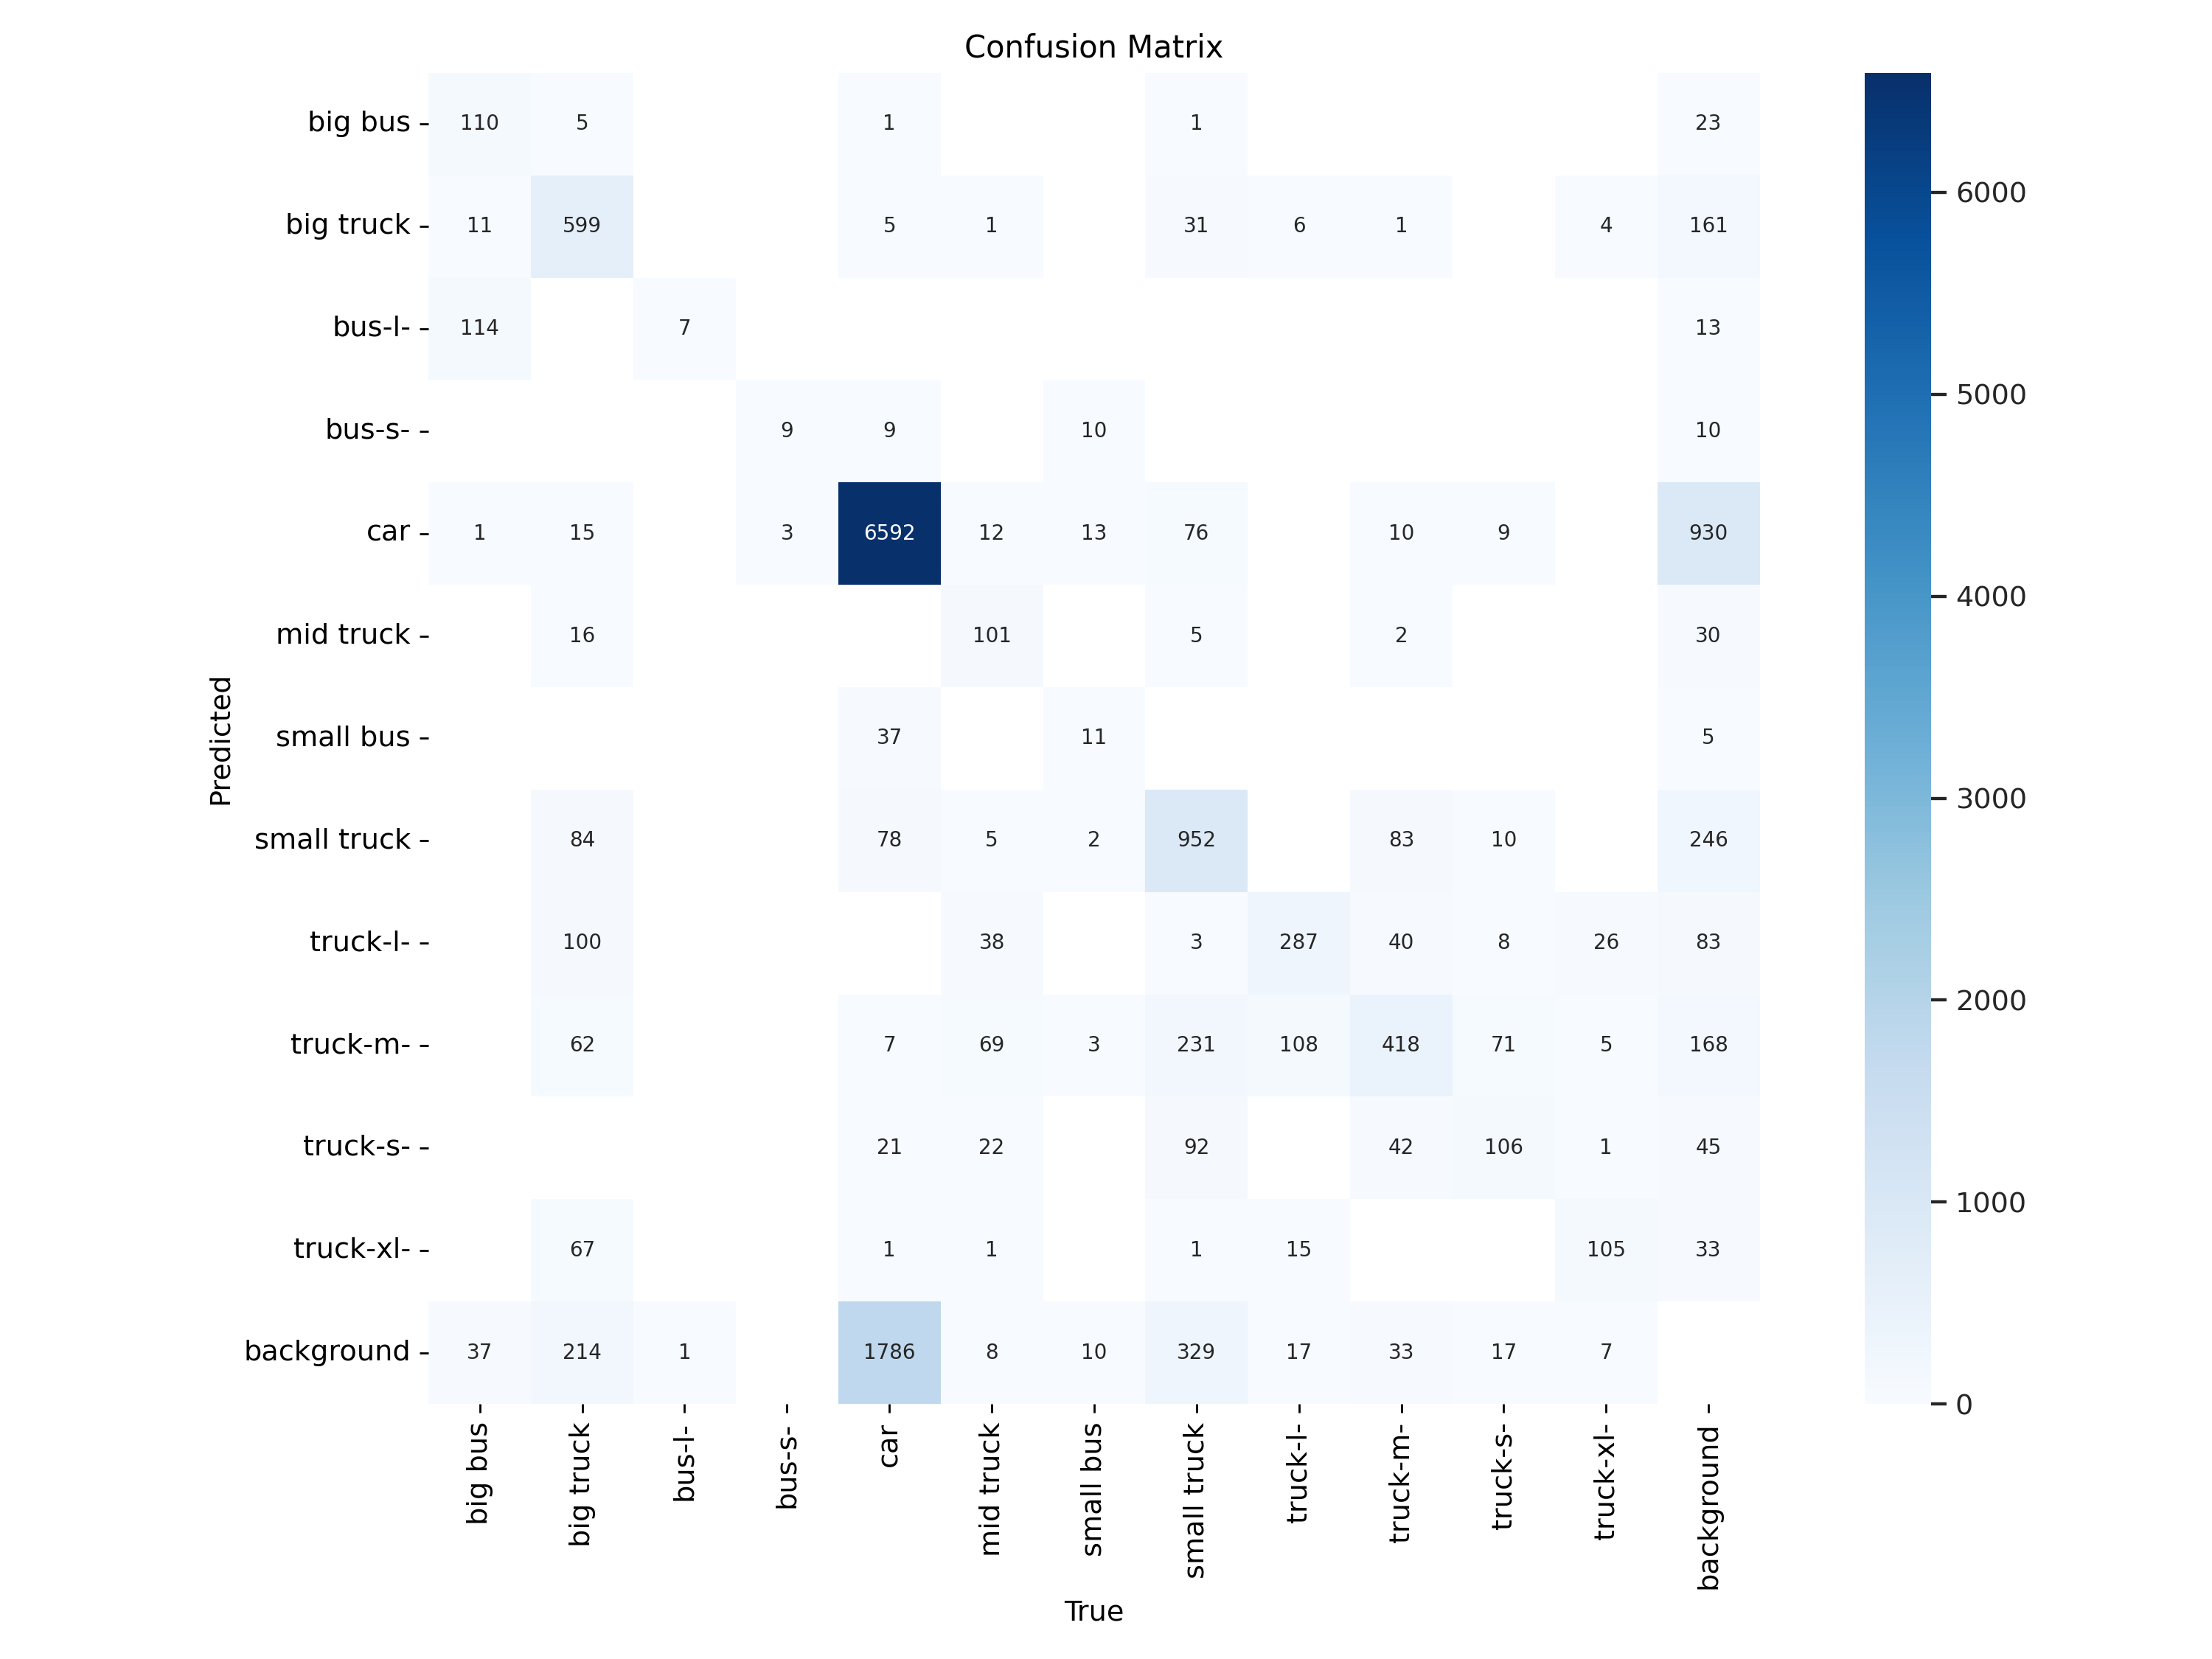

In [9]:
from IPython.display import Image, display

# Ruta de la imagen en Google Colab
imagen_path = '/content/runs/detect/train/confusion_matrix.png'

# Mostrar la imagen
display(Image(filename=imagen_path))

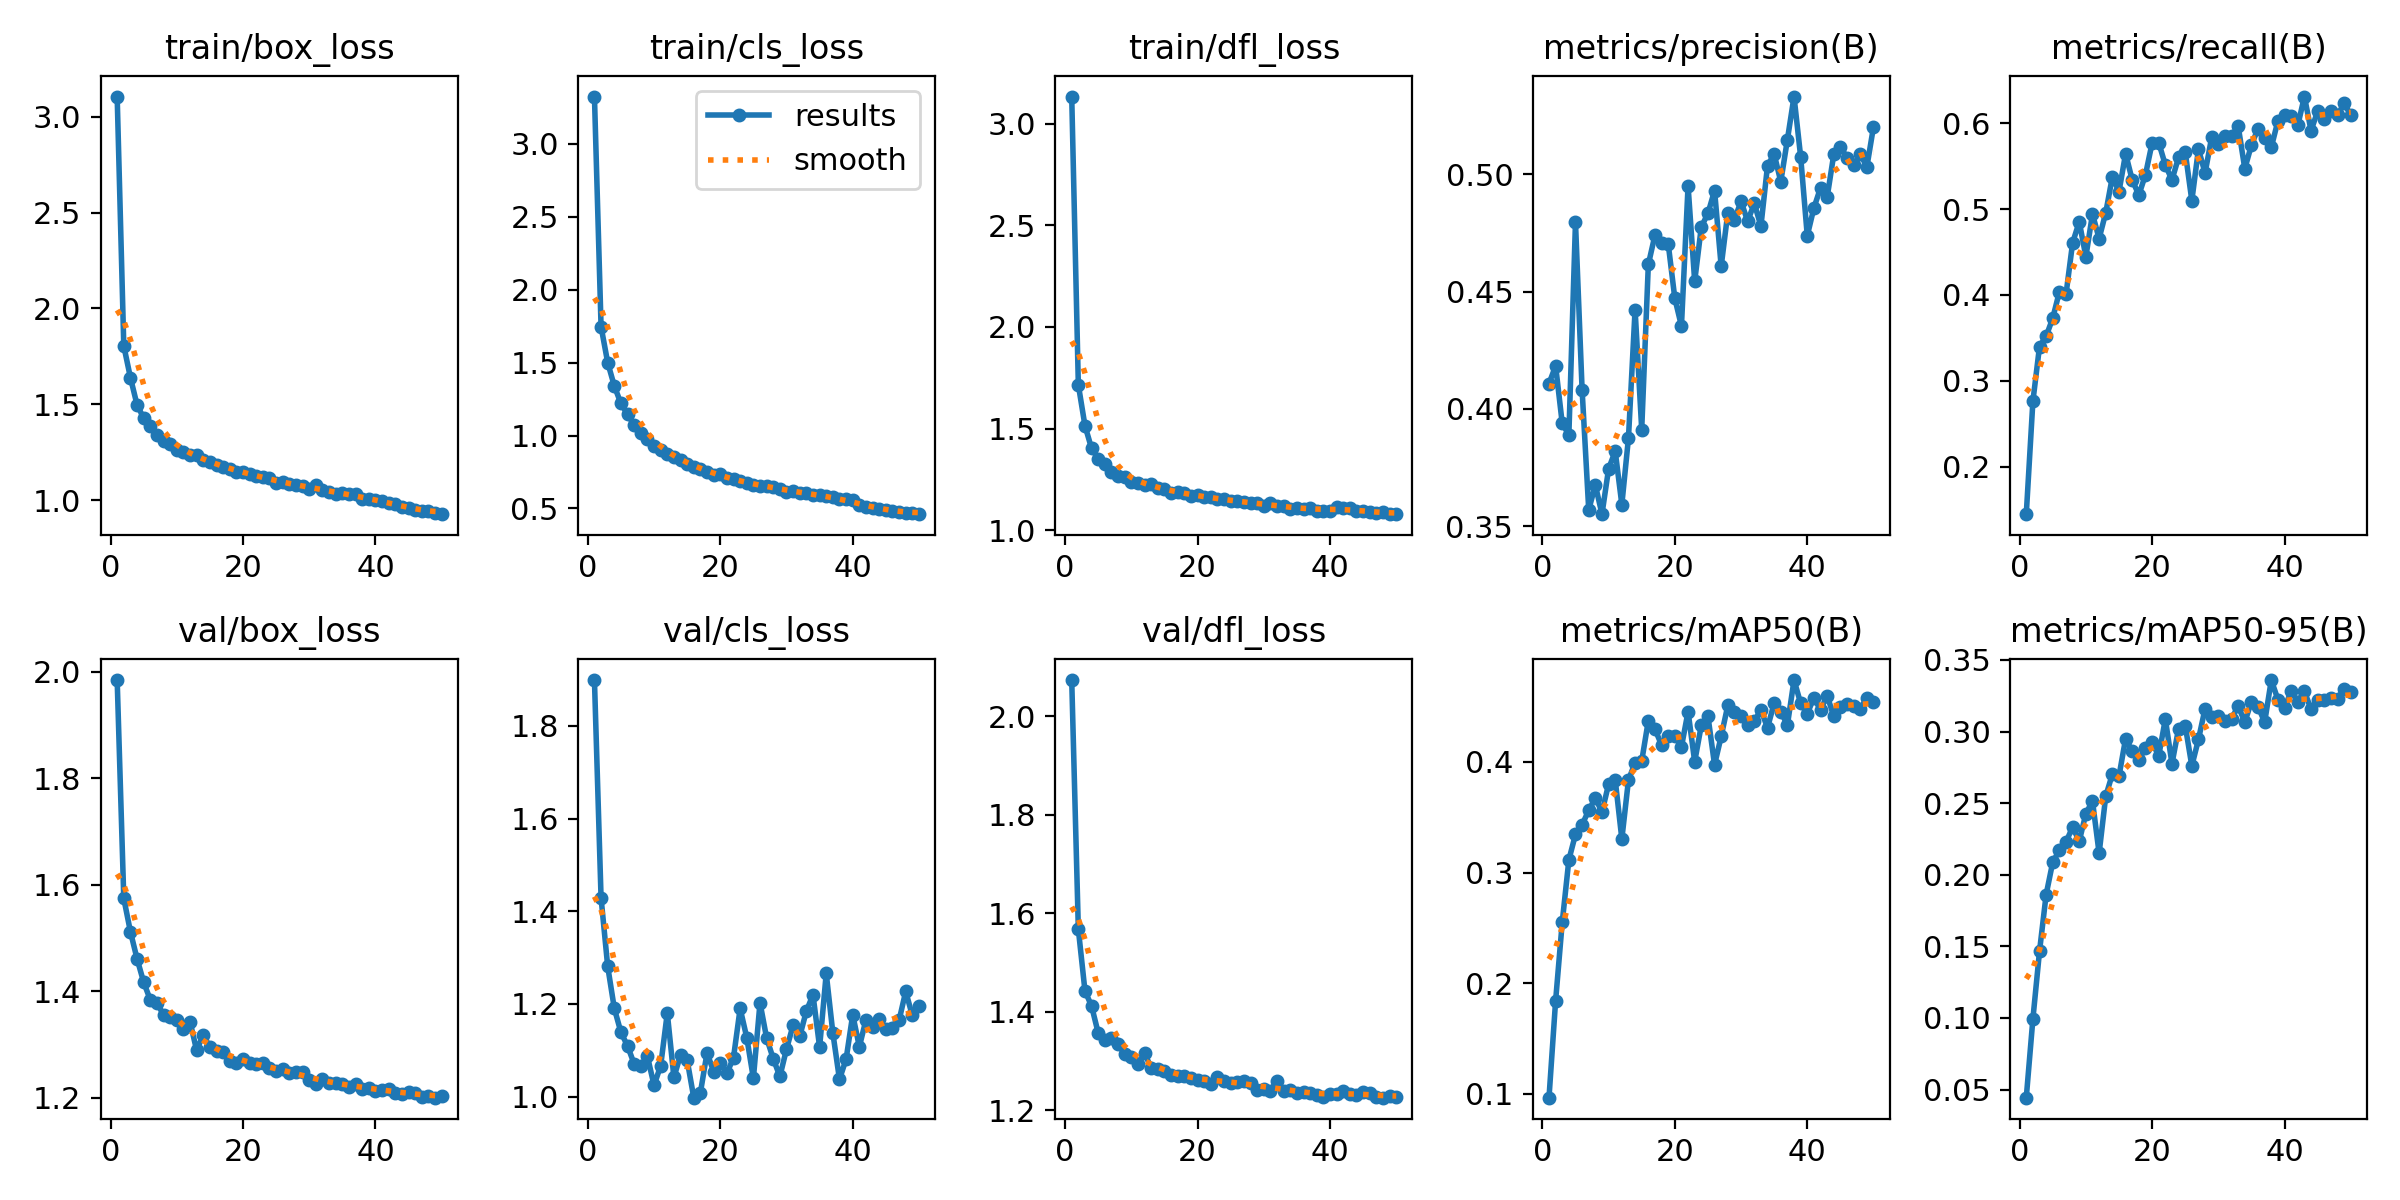

In [10]:
imagen_path = '/content/runs/detect/train/results.png'

# Mostrar la imagen
Image(filename=imagen_path)

###La siguiente celda es para descargar algún archivo en especial dentro del directorio

In [ ]:
from google.colab import files

# Ruta del archivo a descargar
ruta_archivo = '/content/runs/detect/train2/weights/best.pt'

# Descargar el archivo
files.download(ruta_archivo)

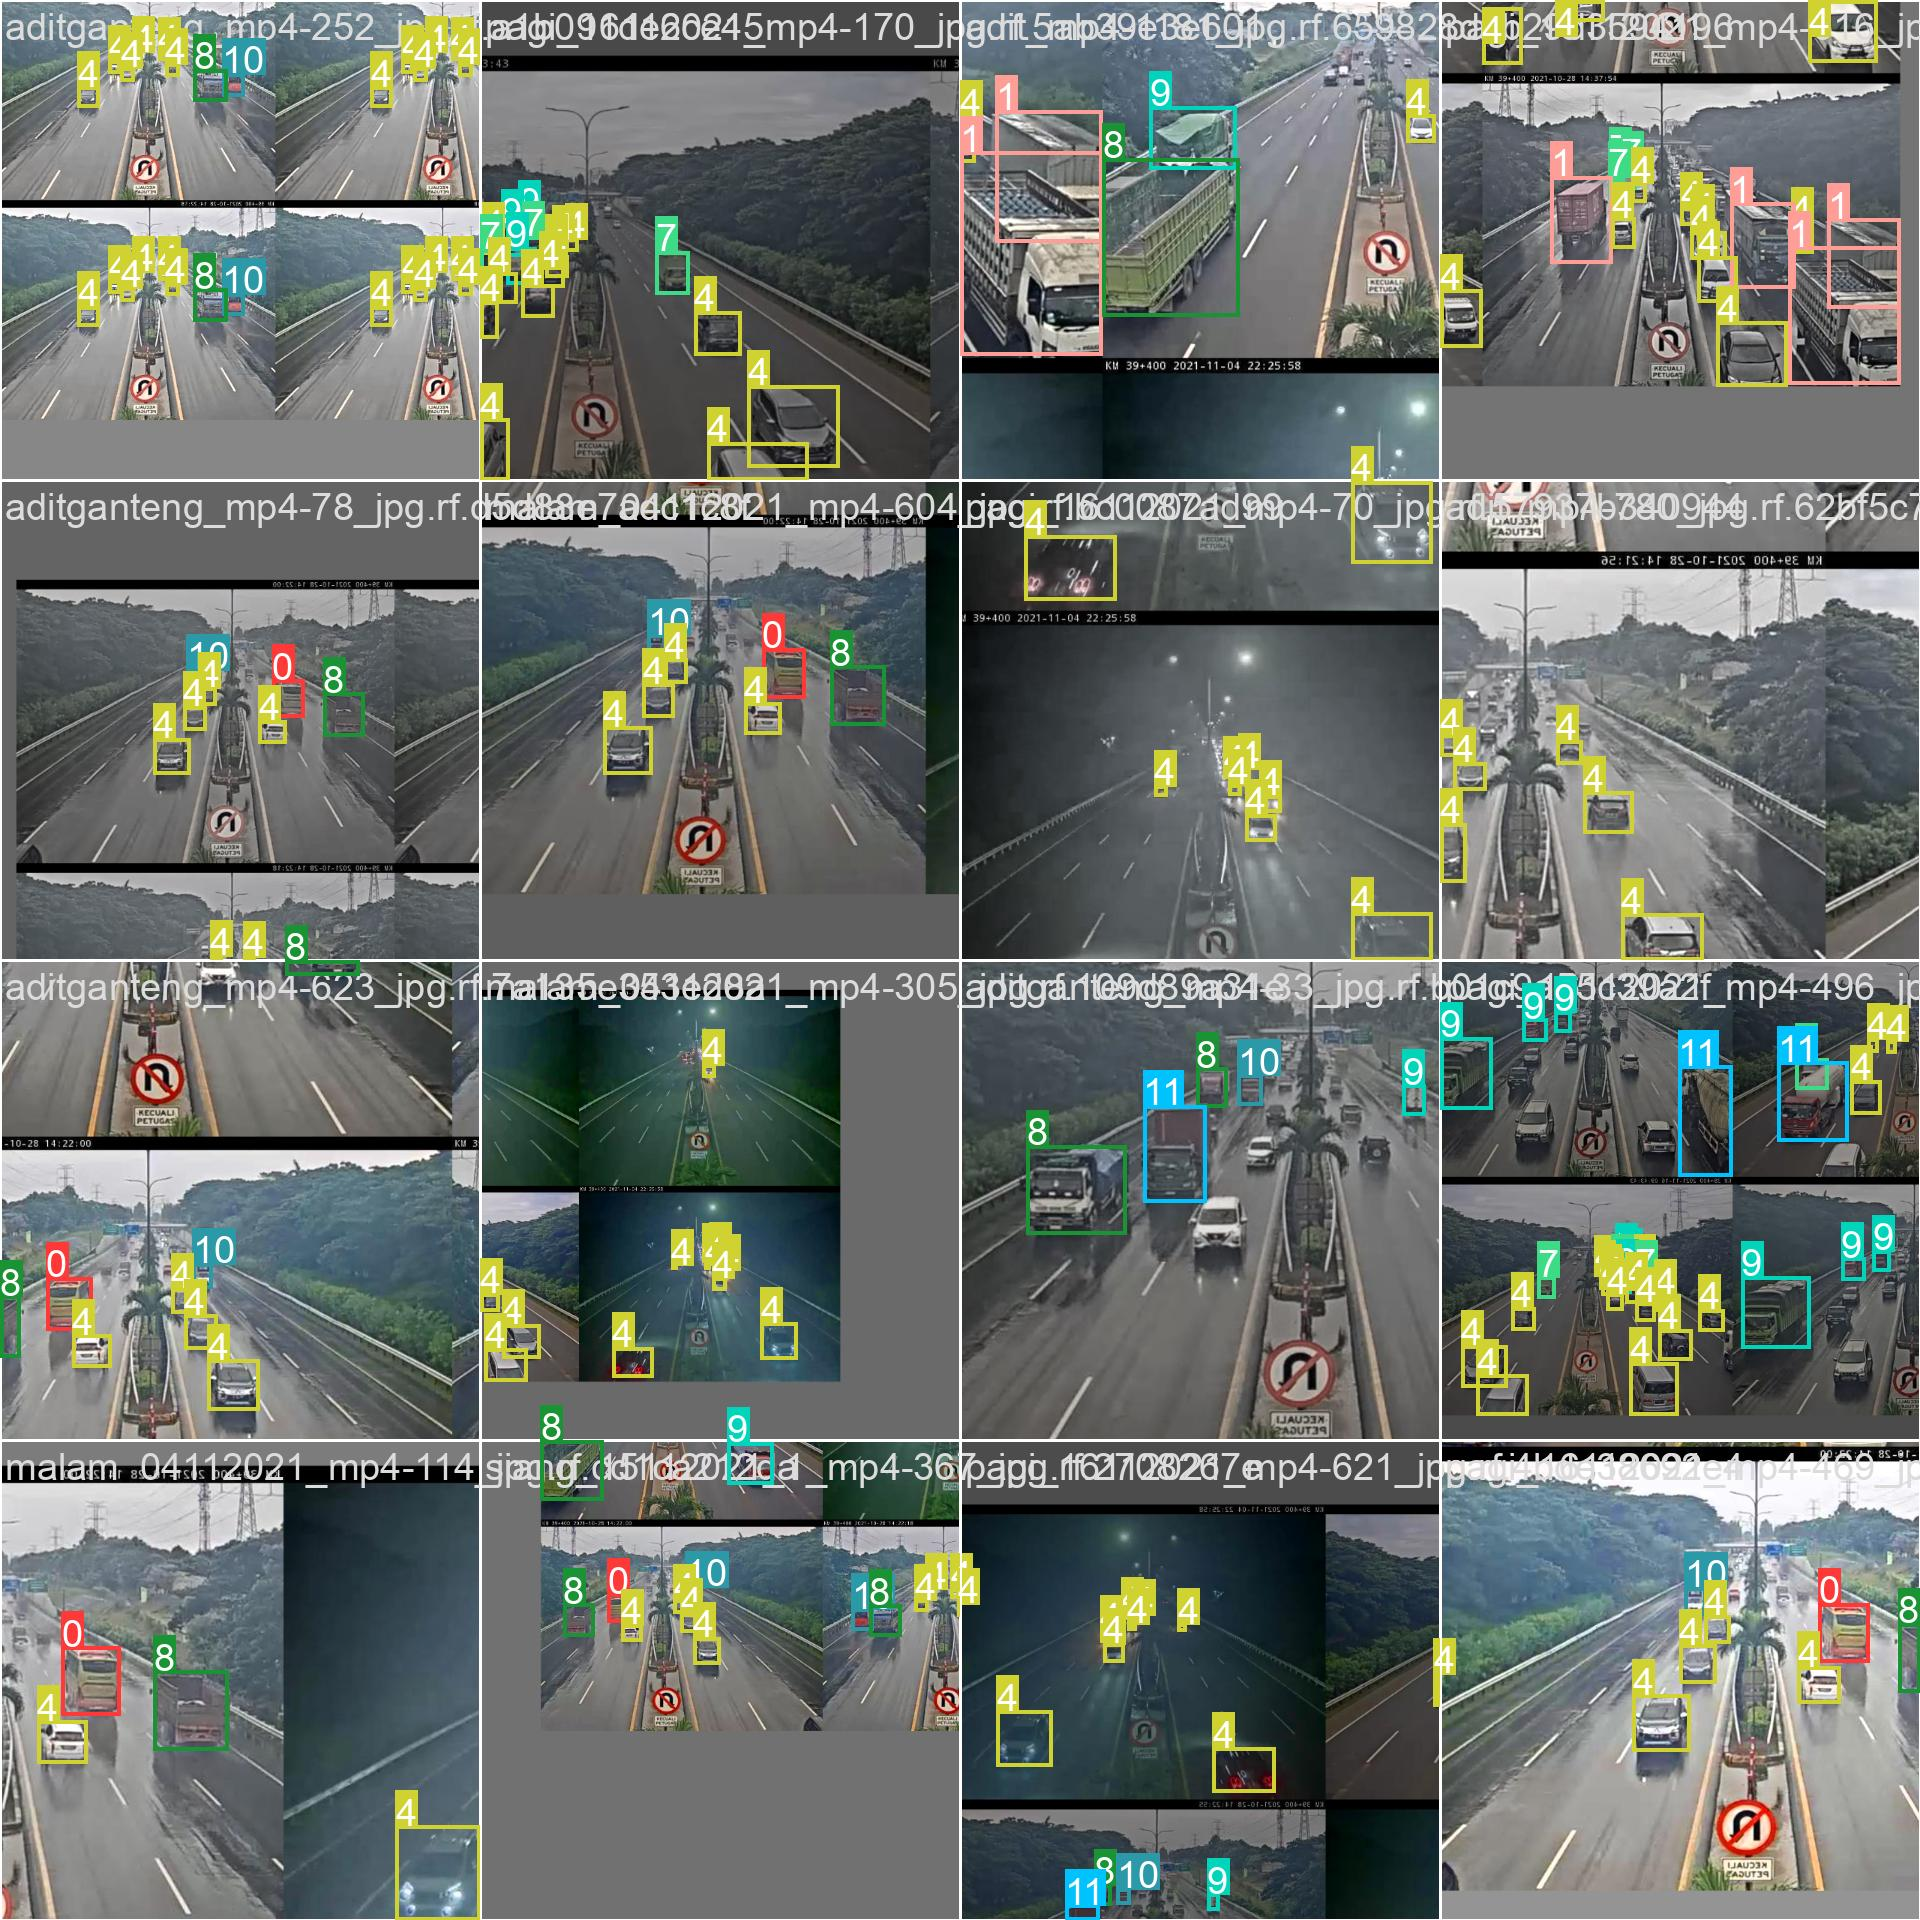

In [12]:
imagen_path = '/content/runs/detect/train/train_batch0.jpg'

# Mostrar la imagen
Image(filename=imagen_path)

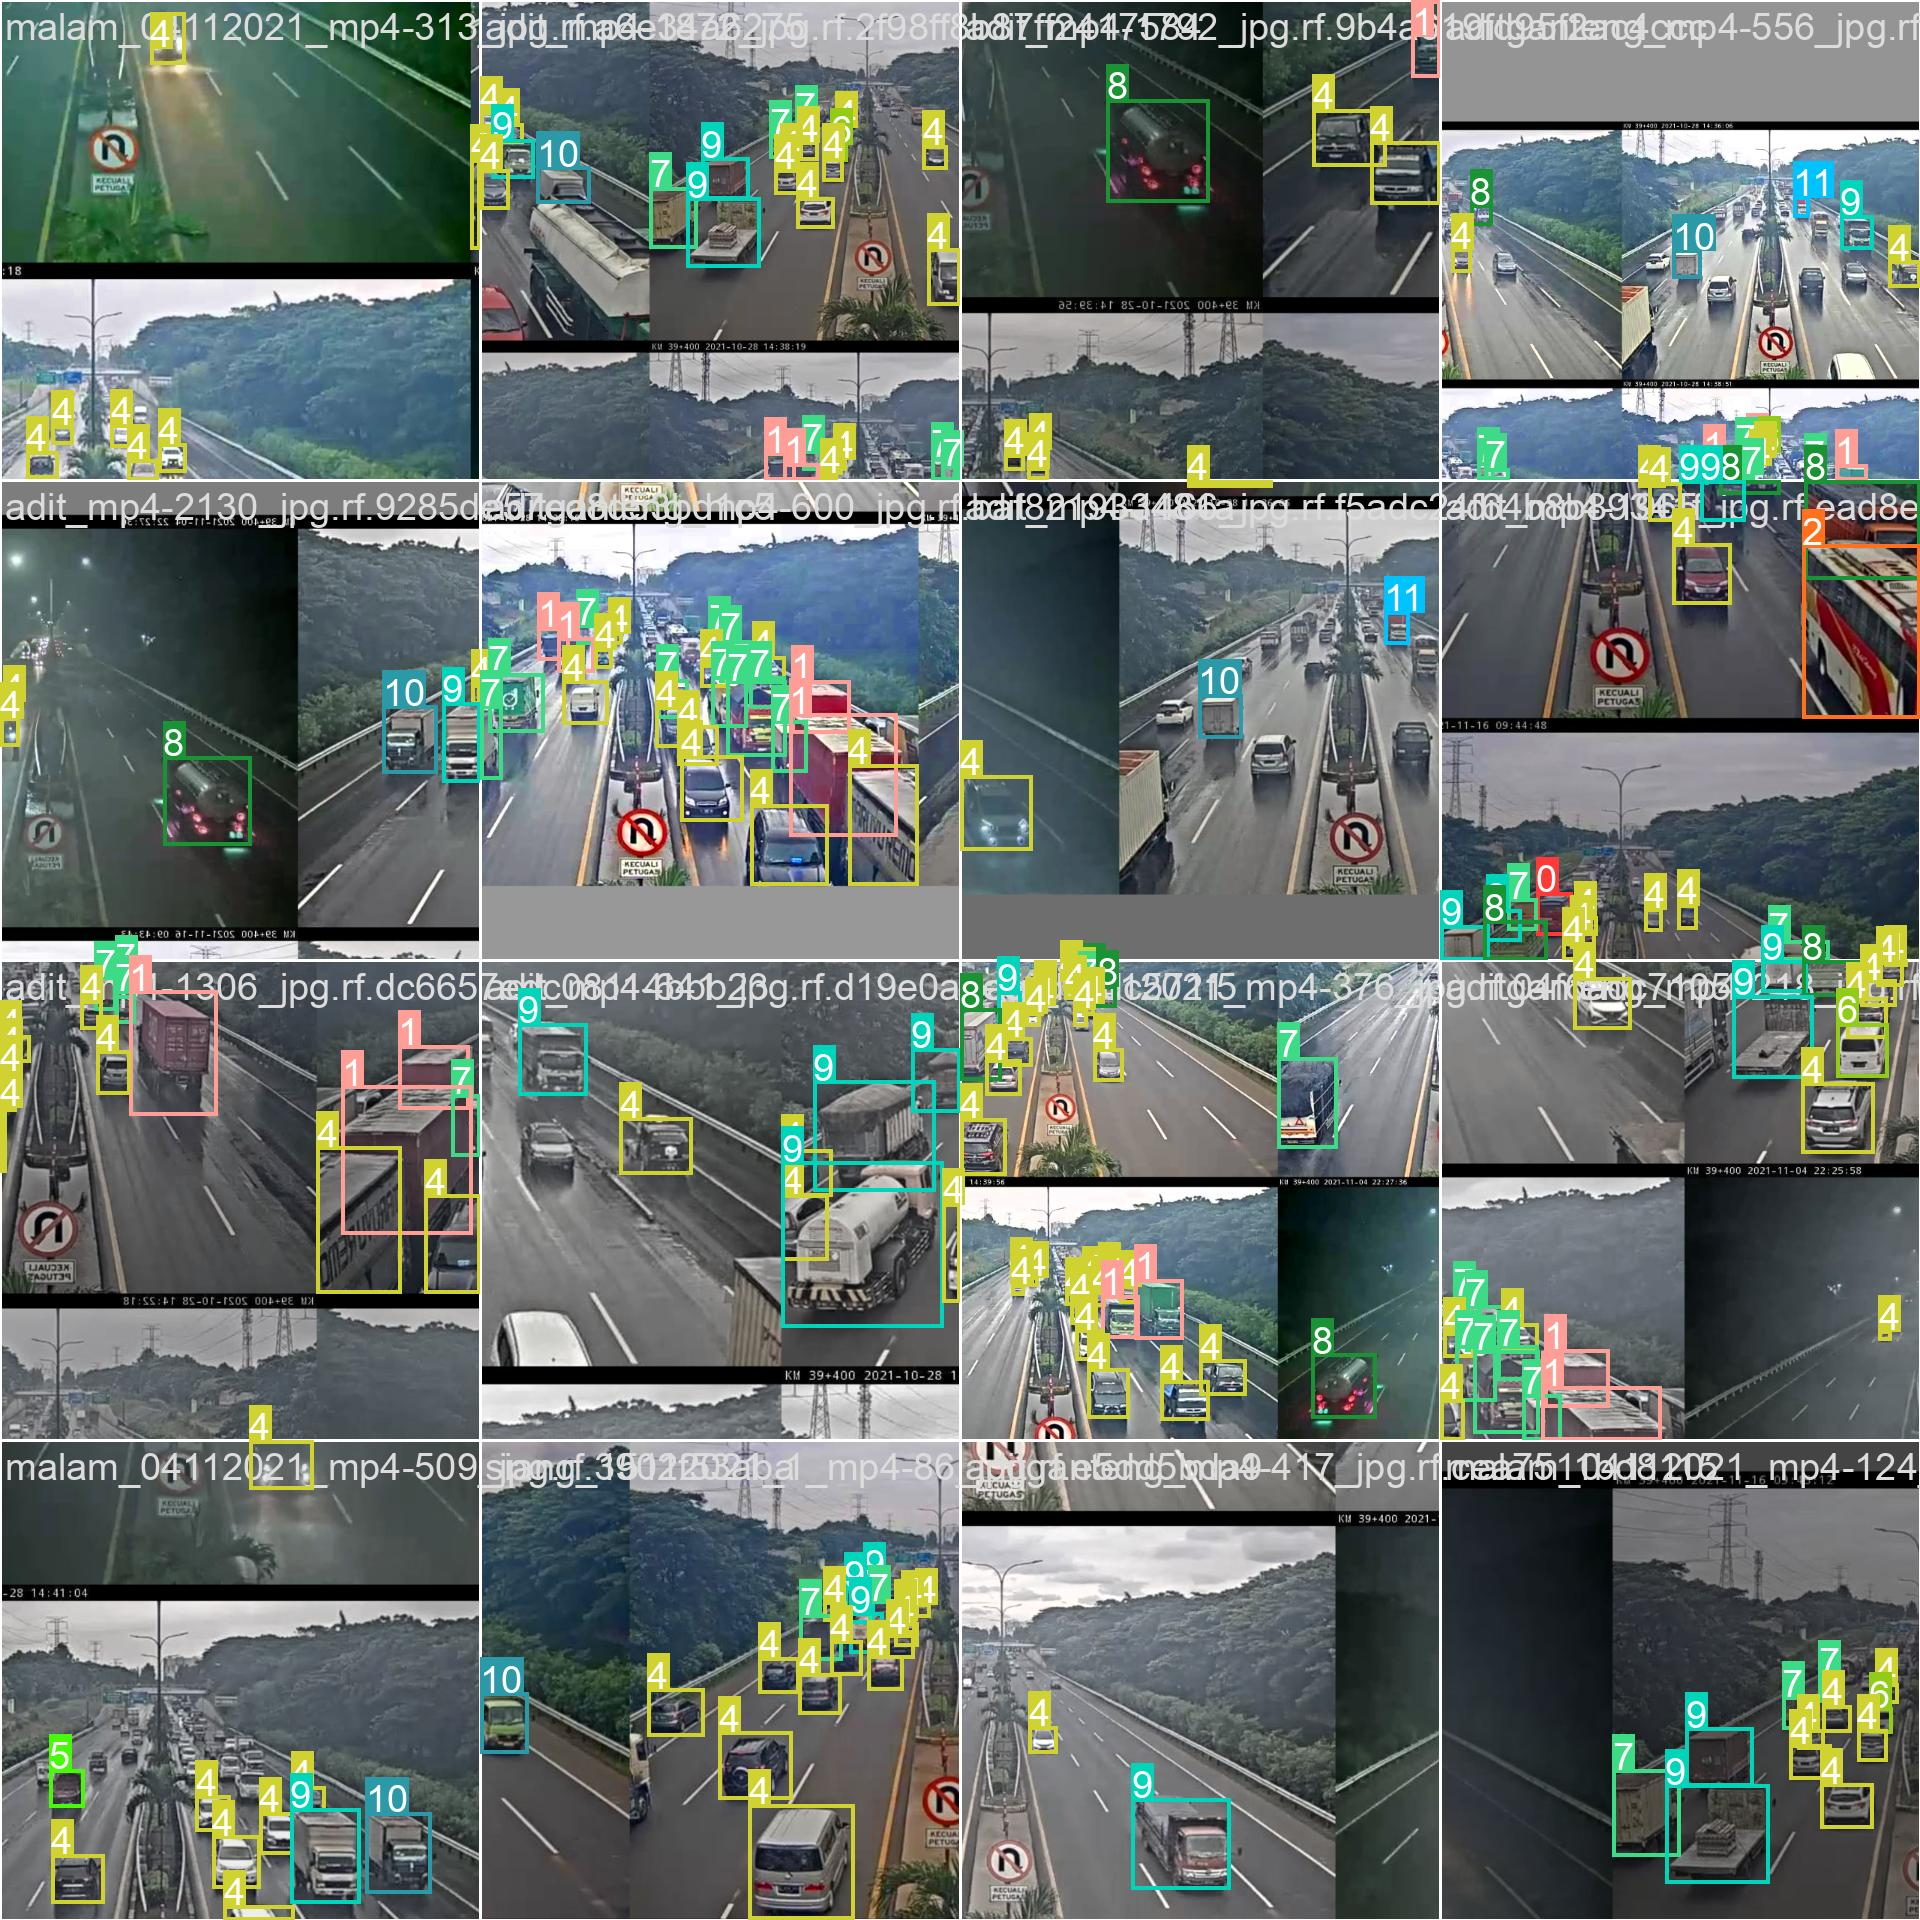

In [13]:
imagen_path = '/content/runs/detect/train/train_batch2.jpg'

# Mostrar la imagen
Image(filename=imagen_path)

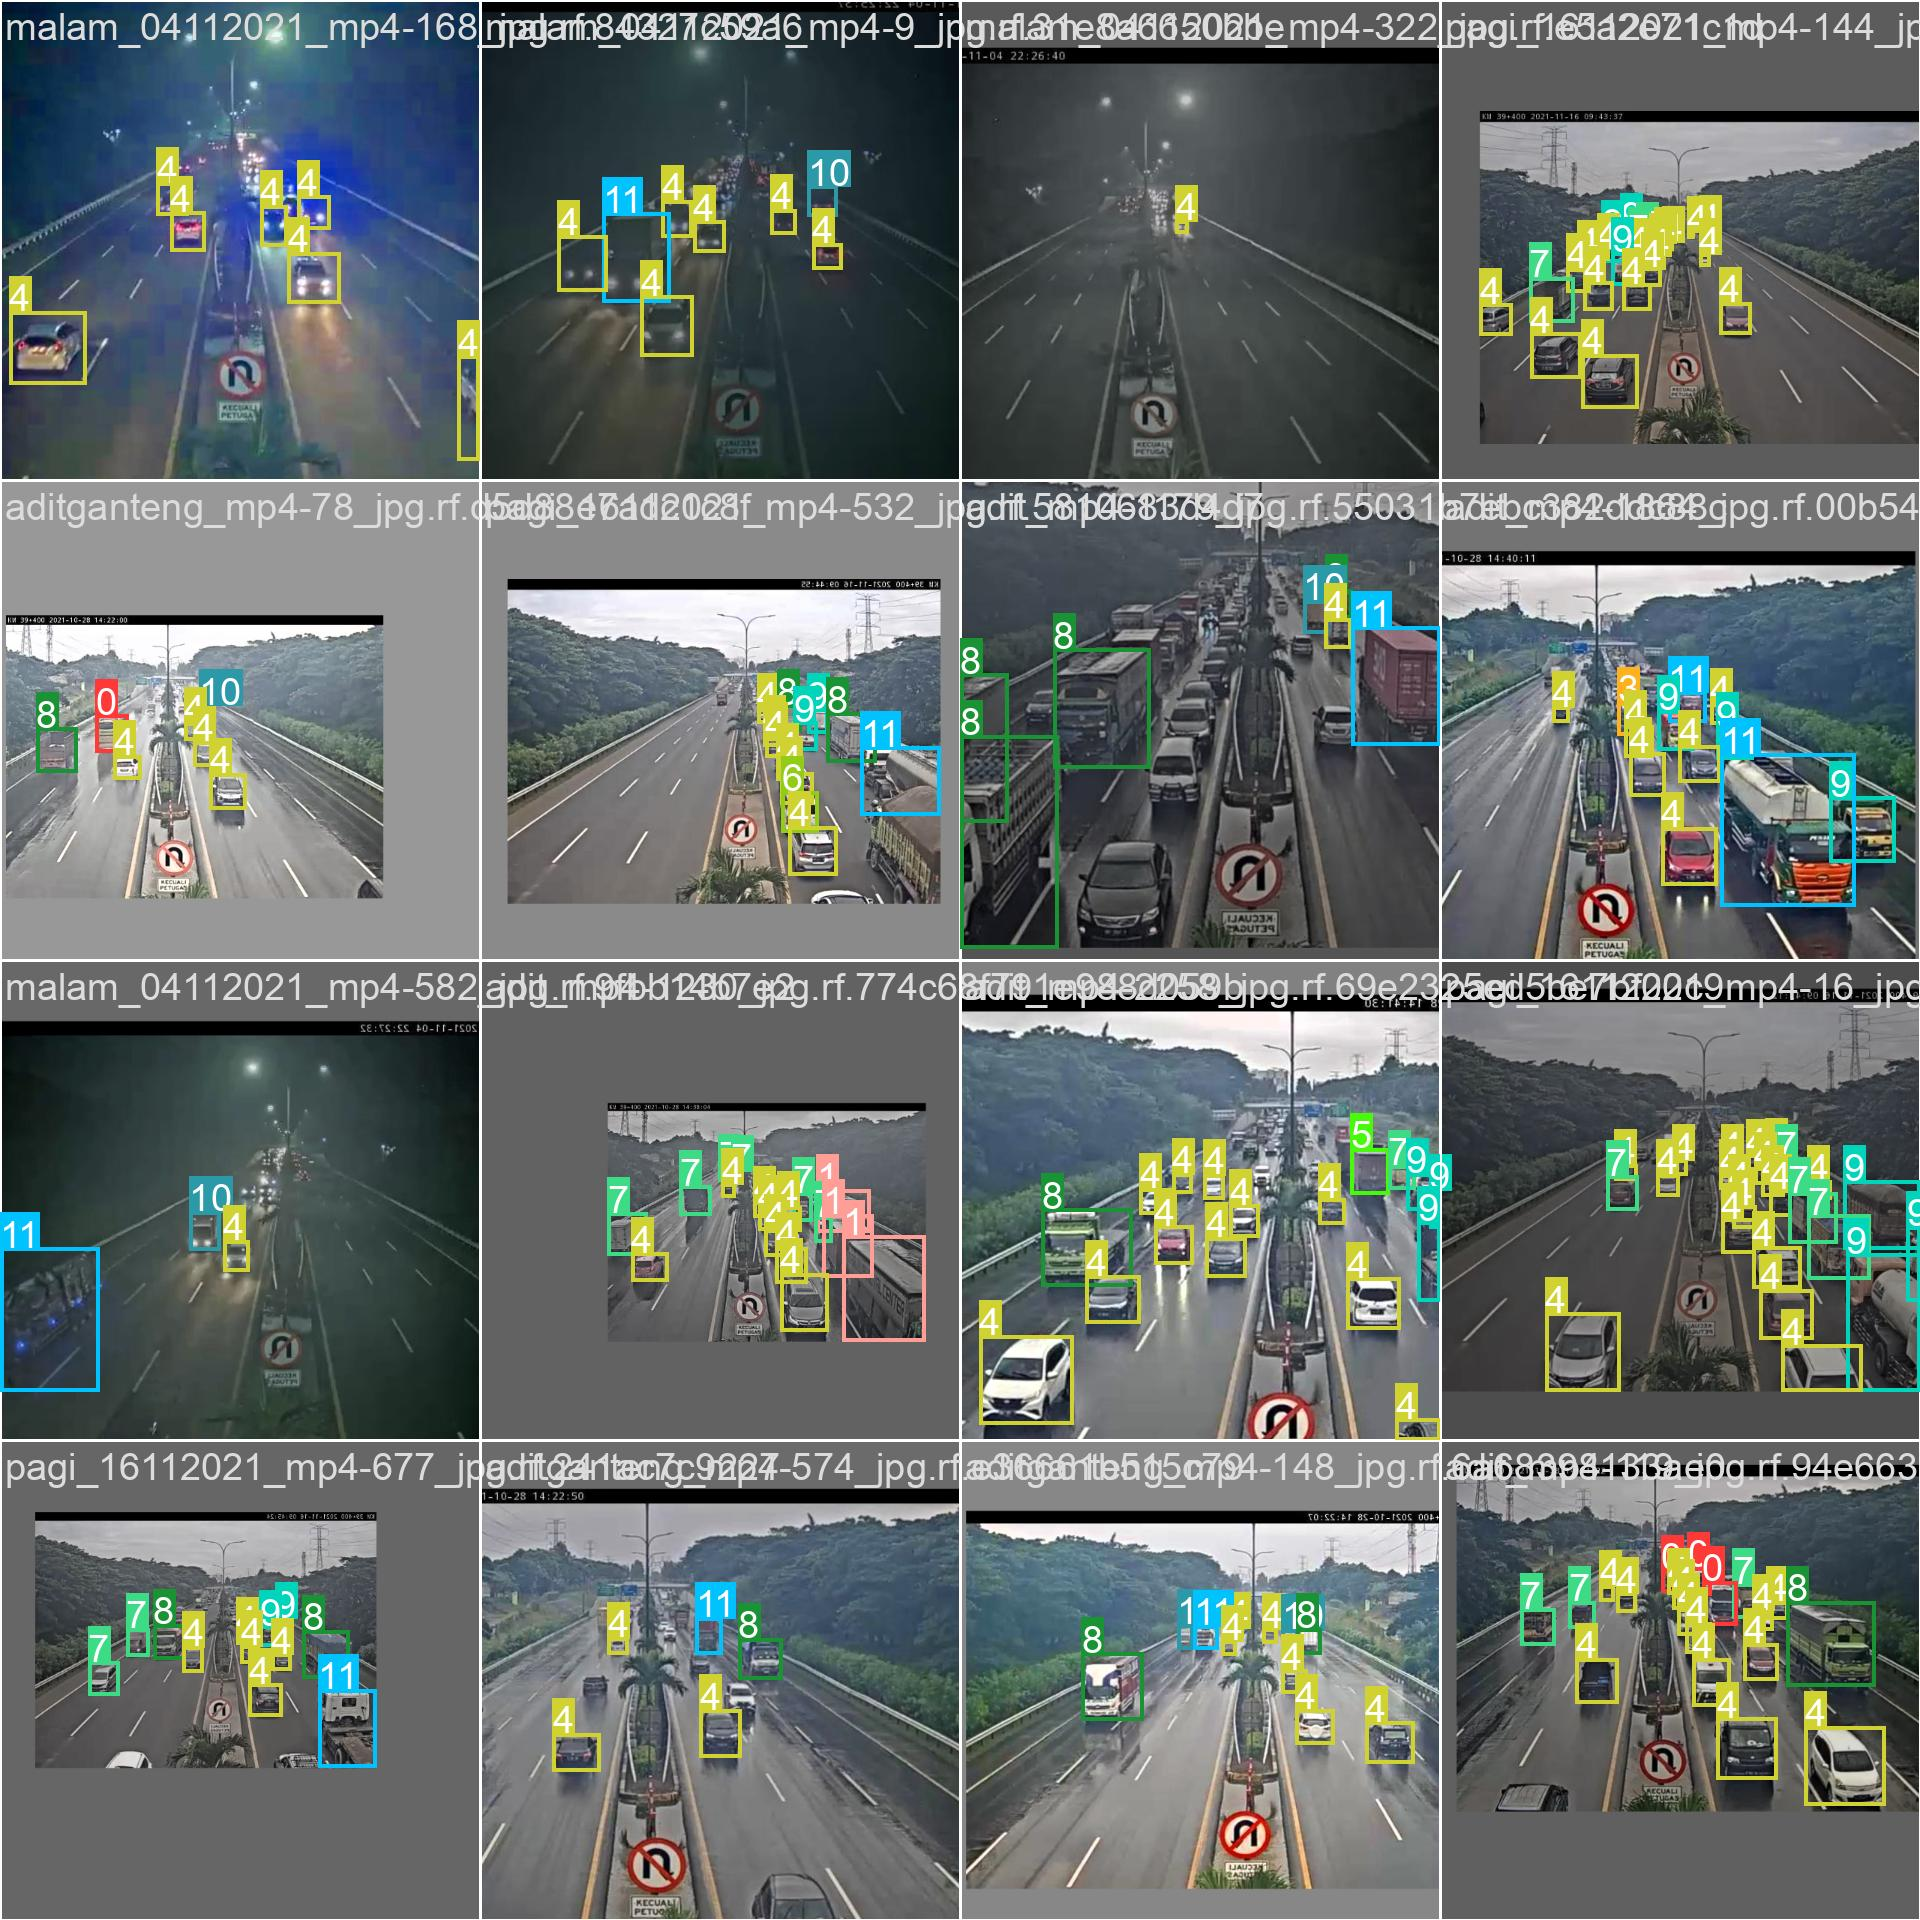

In [14]:
imagen_path = '/content/runs/detect/train/train_batch6600.jpg'

# Mostrar la imagen
Image(filename=imagen_path)

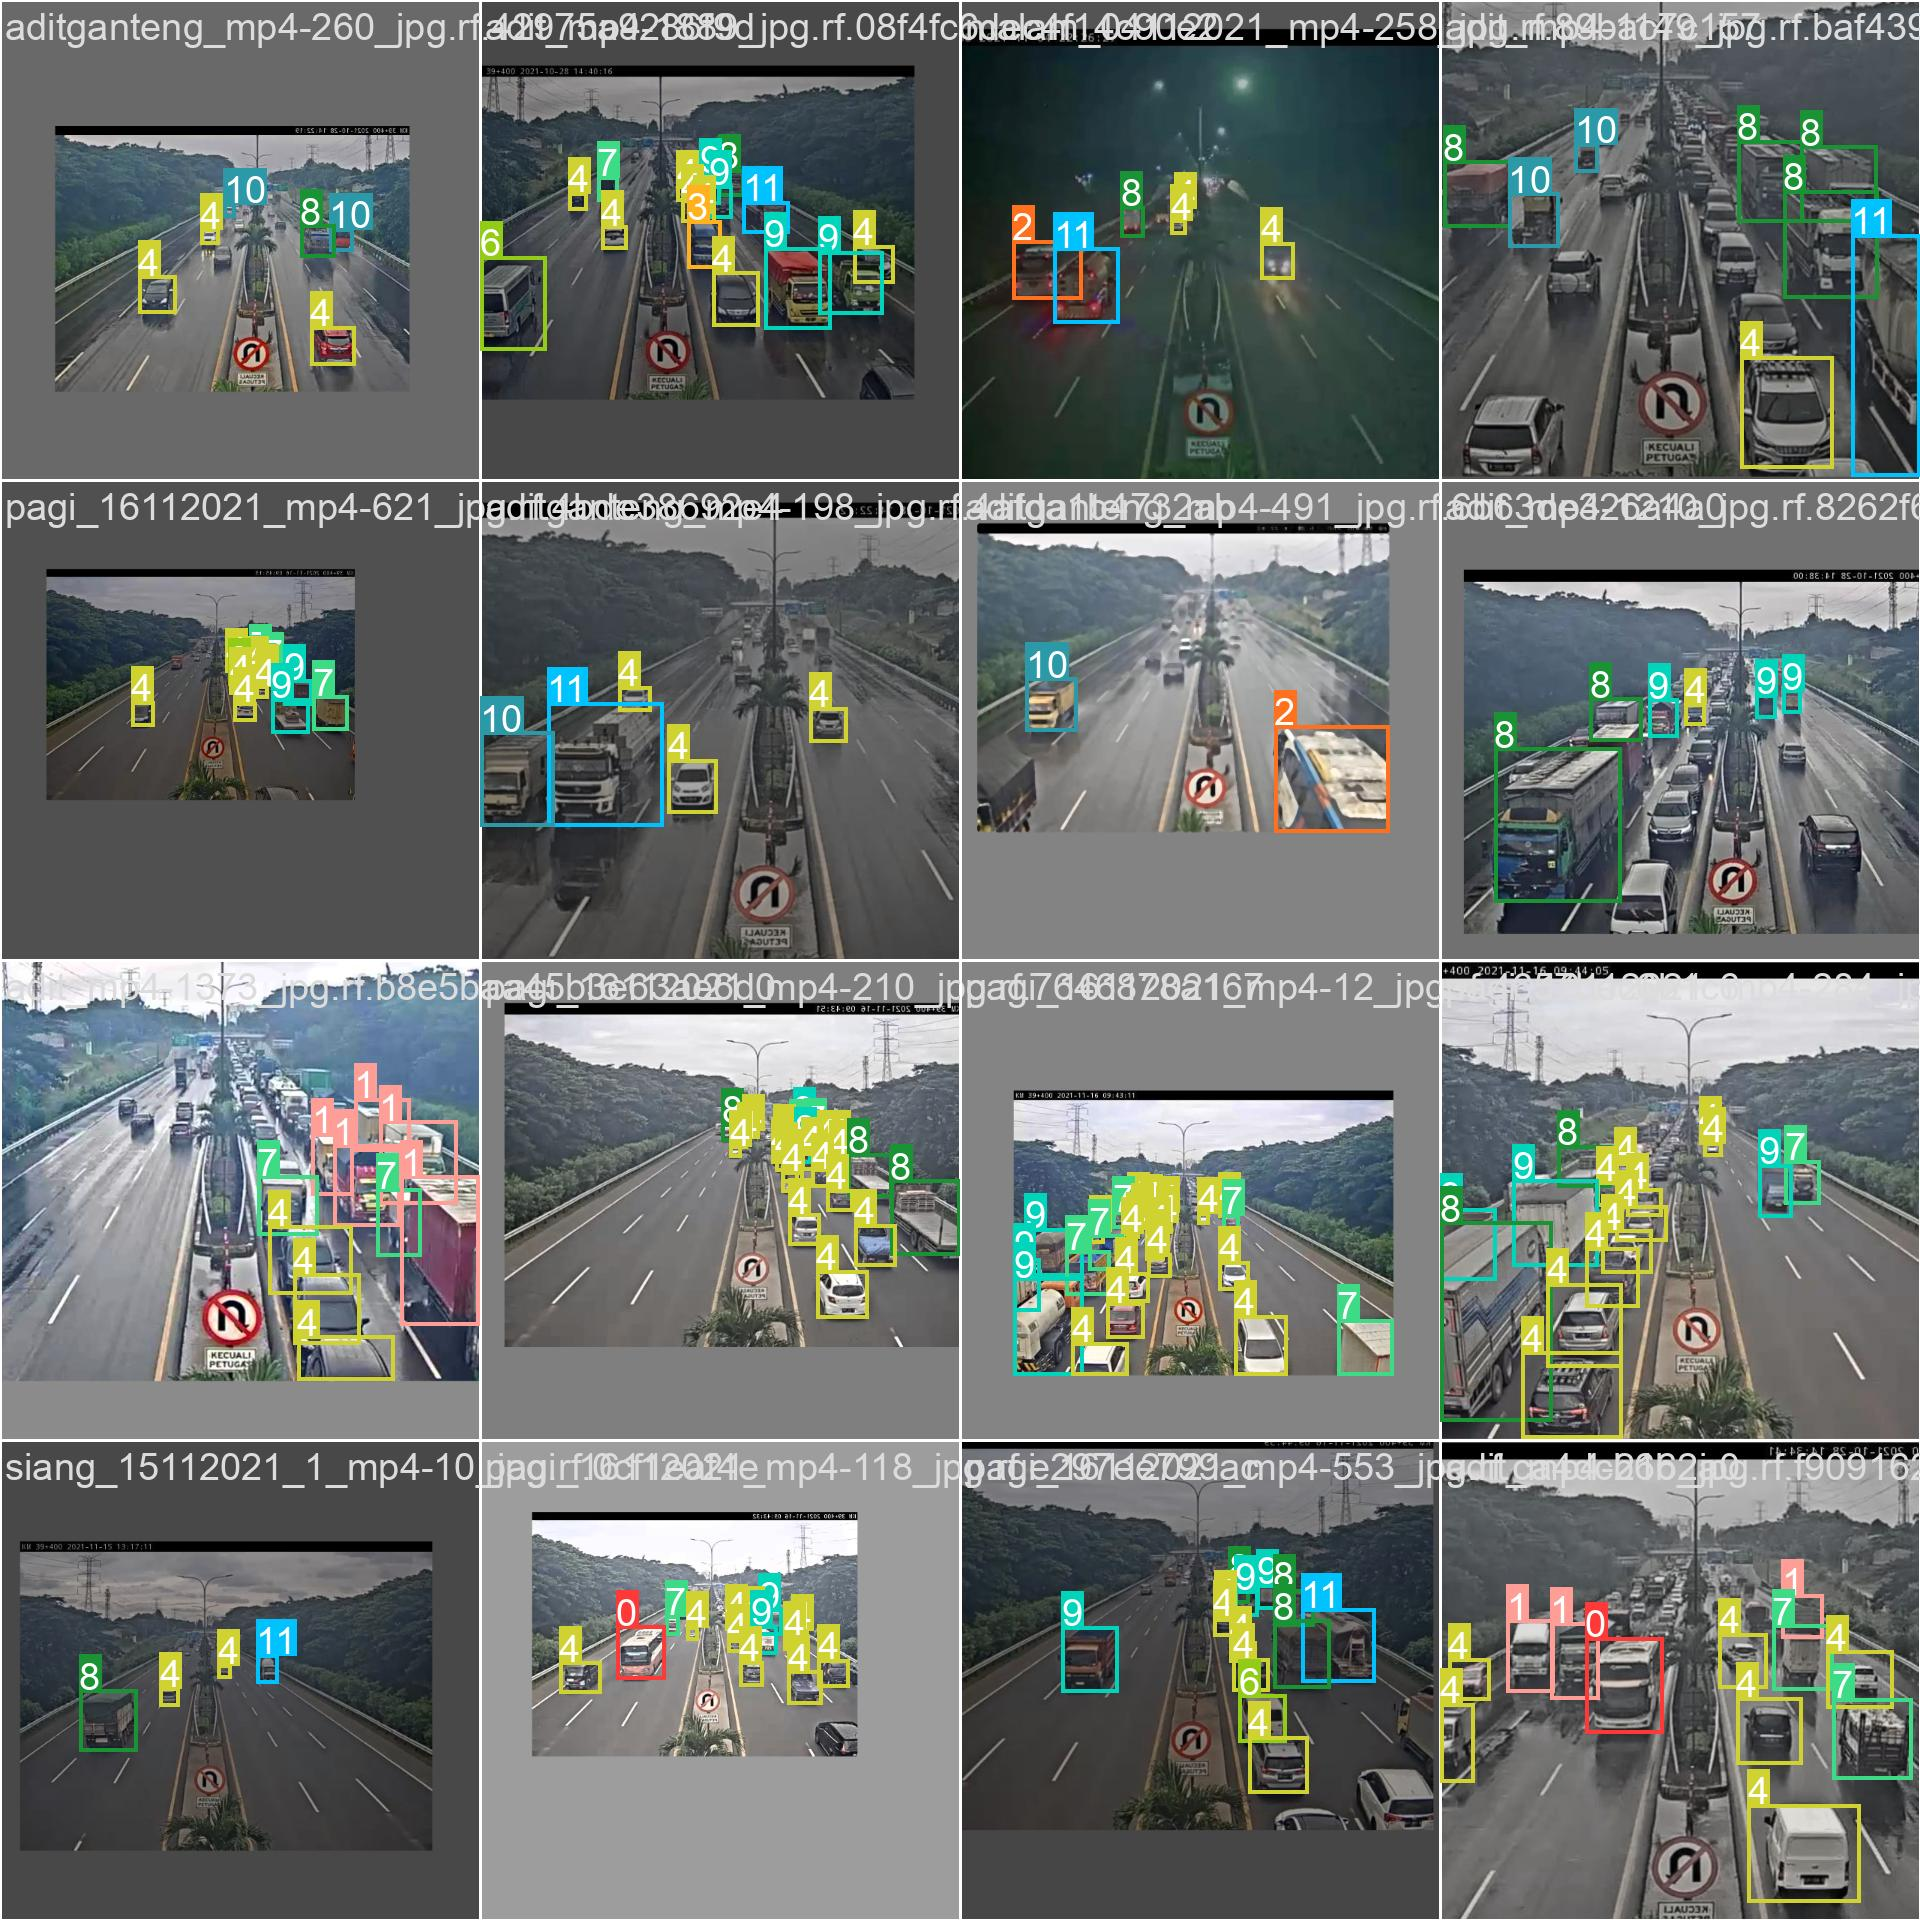

In [15]:
imagen_path = '/content/runs/detect/train/train_batch6601.jpg'

# Mostrar la imagen
Image(filename=imagen_path)

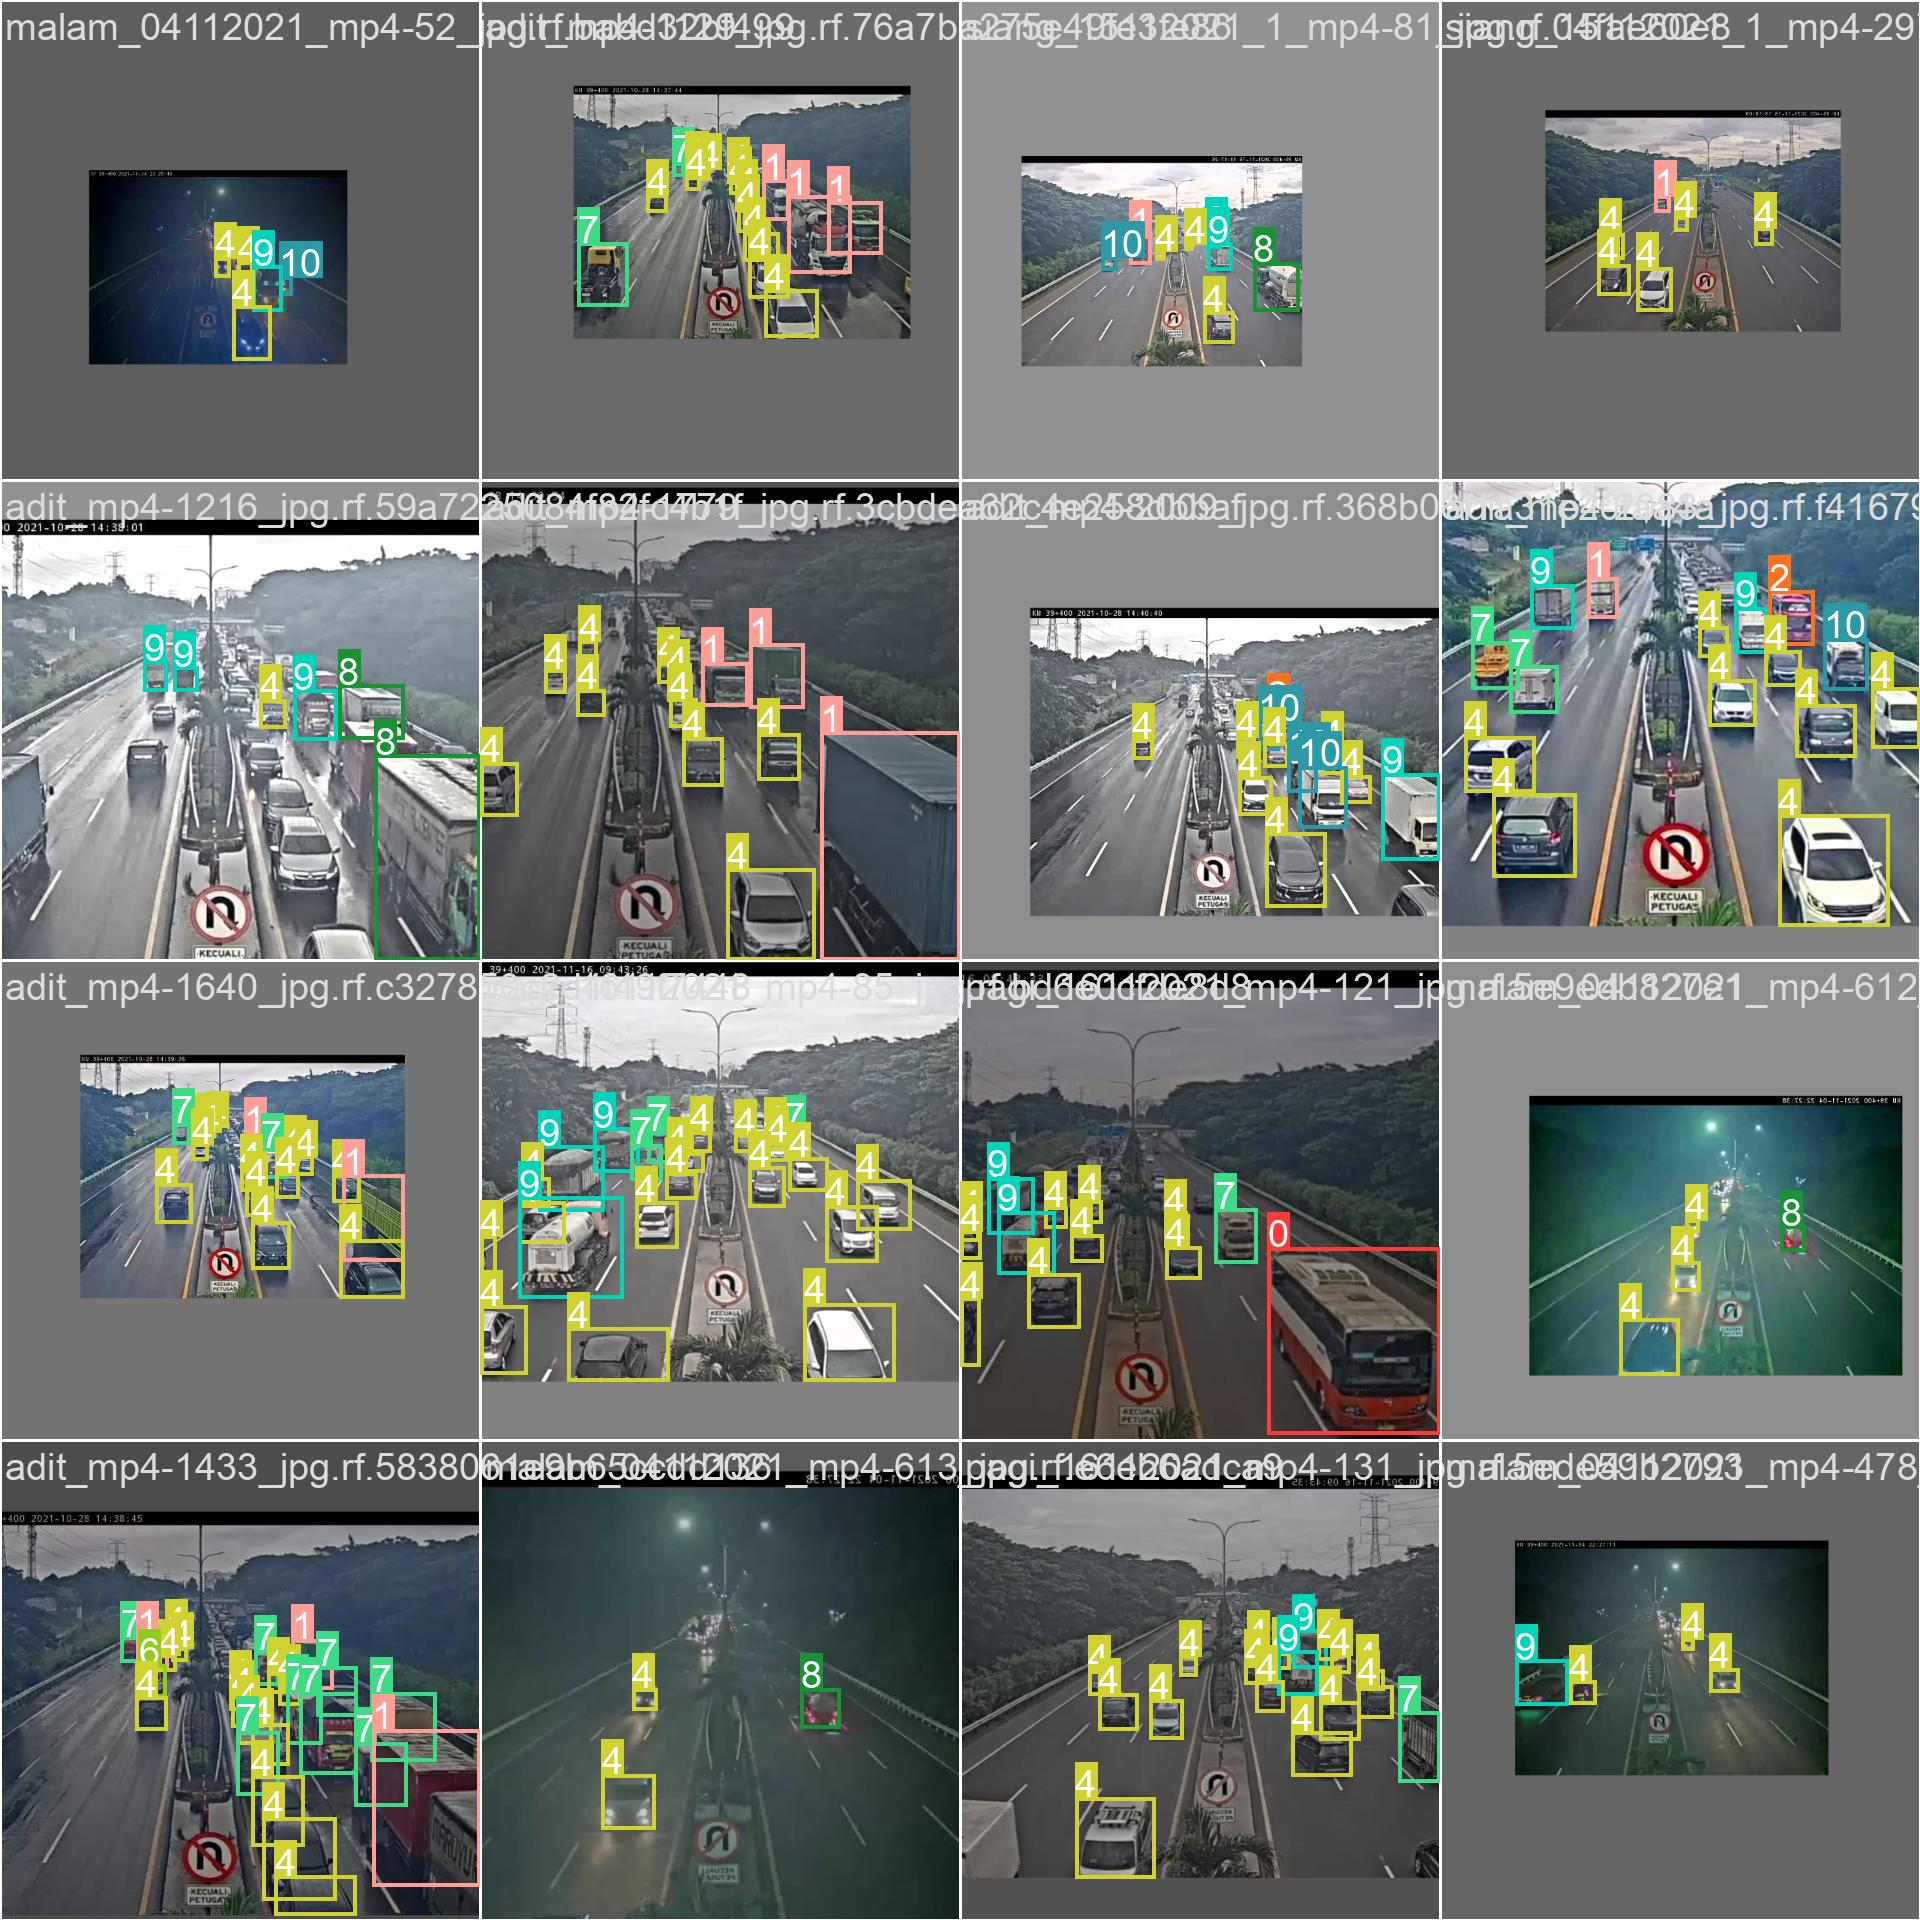

In [16]:
imagen_path = '/content/runs/detect/train/train_batch6602.jpg'

# Mostrar la imagen
Image(filename=imagen_path)

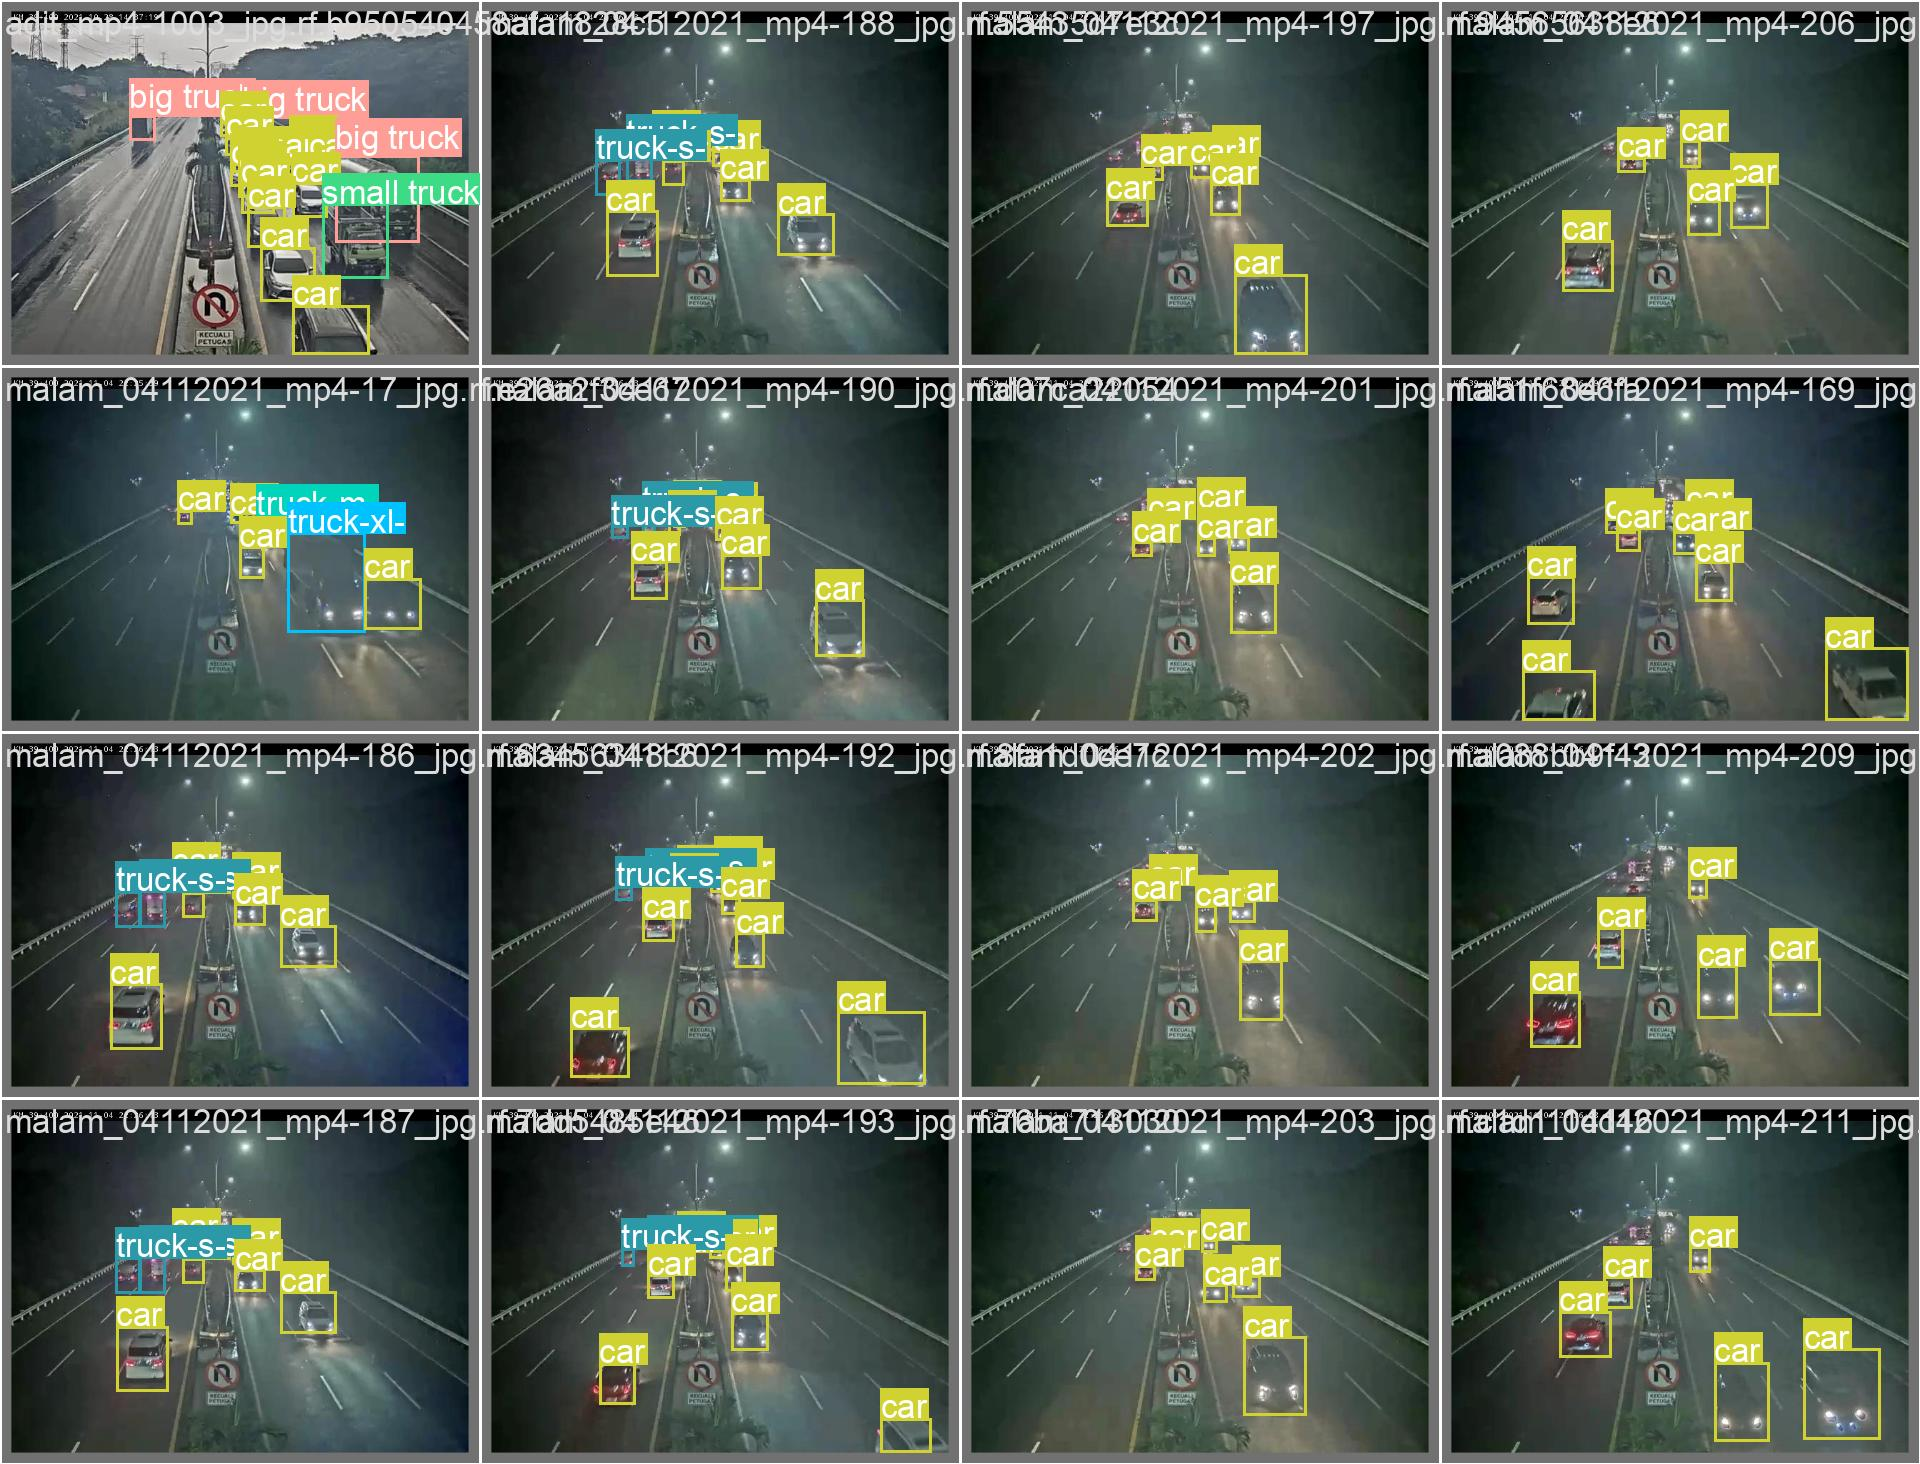

In [17]:
imagen_path = '/content/runs/detect/train/val_batch0_labels.jpg'

# Mostrar la imagen
Image(filename=imagen_path)

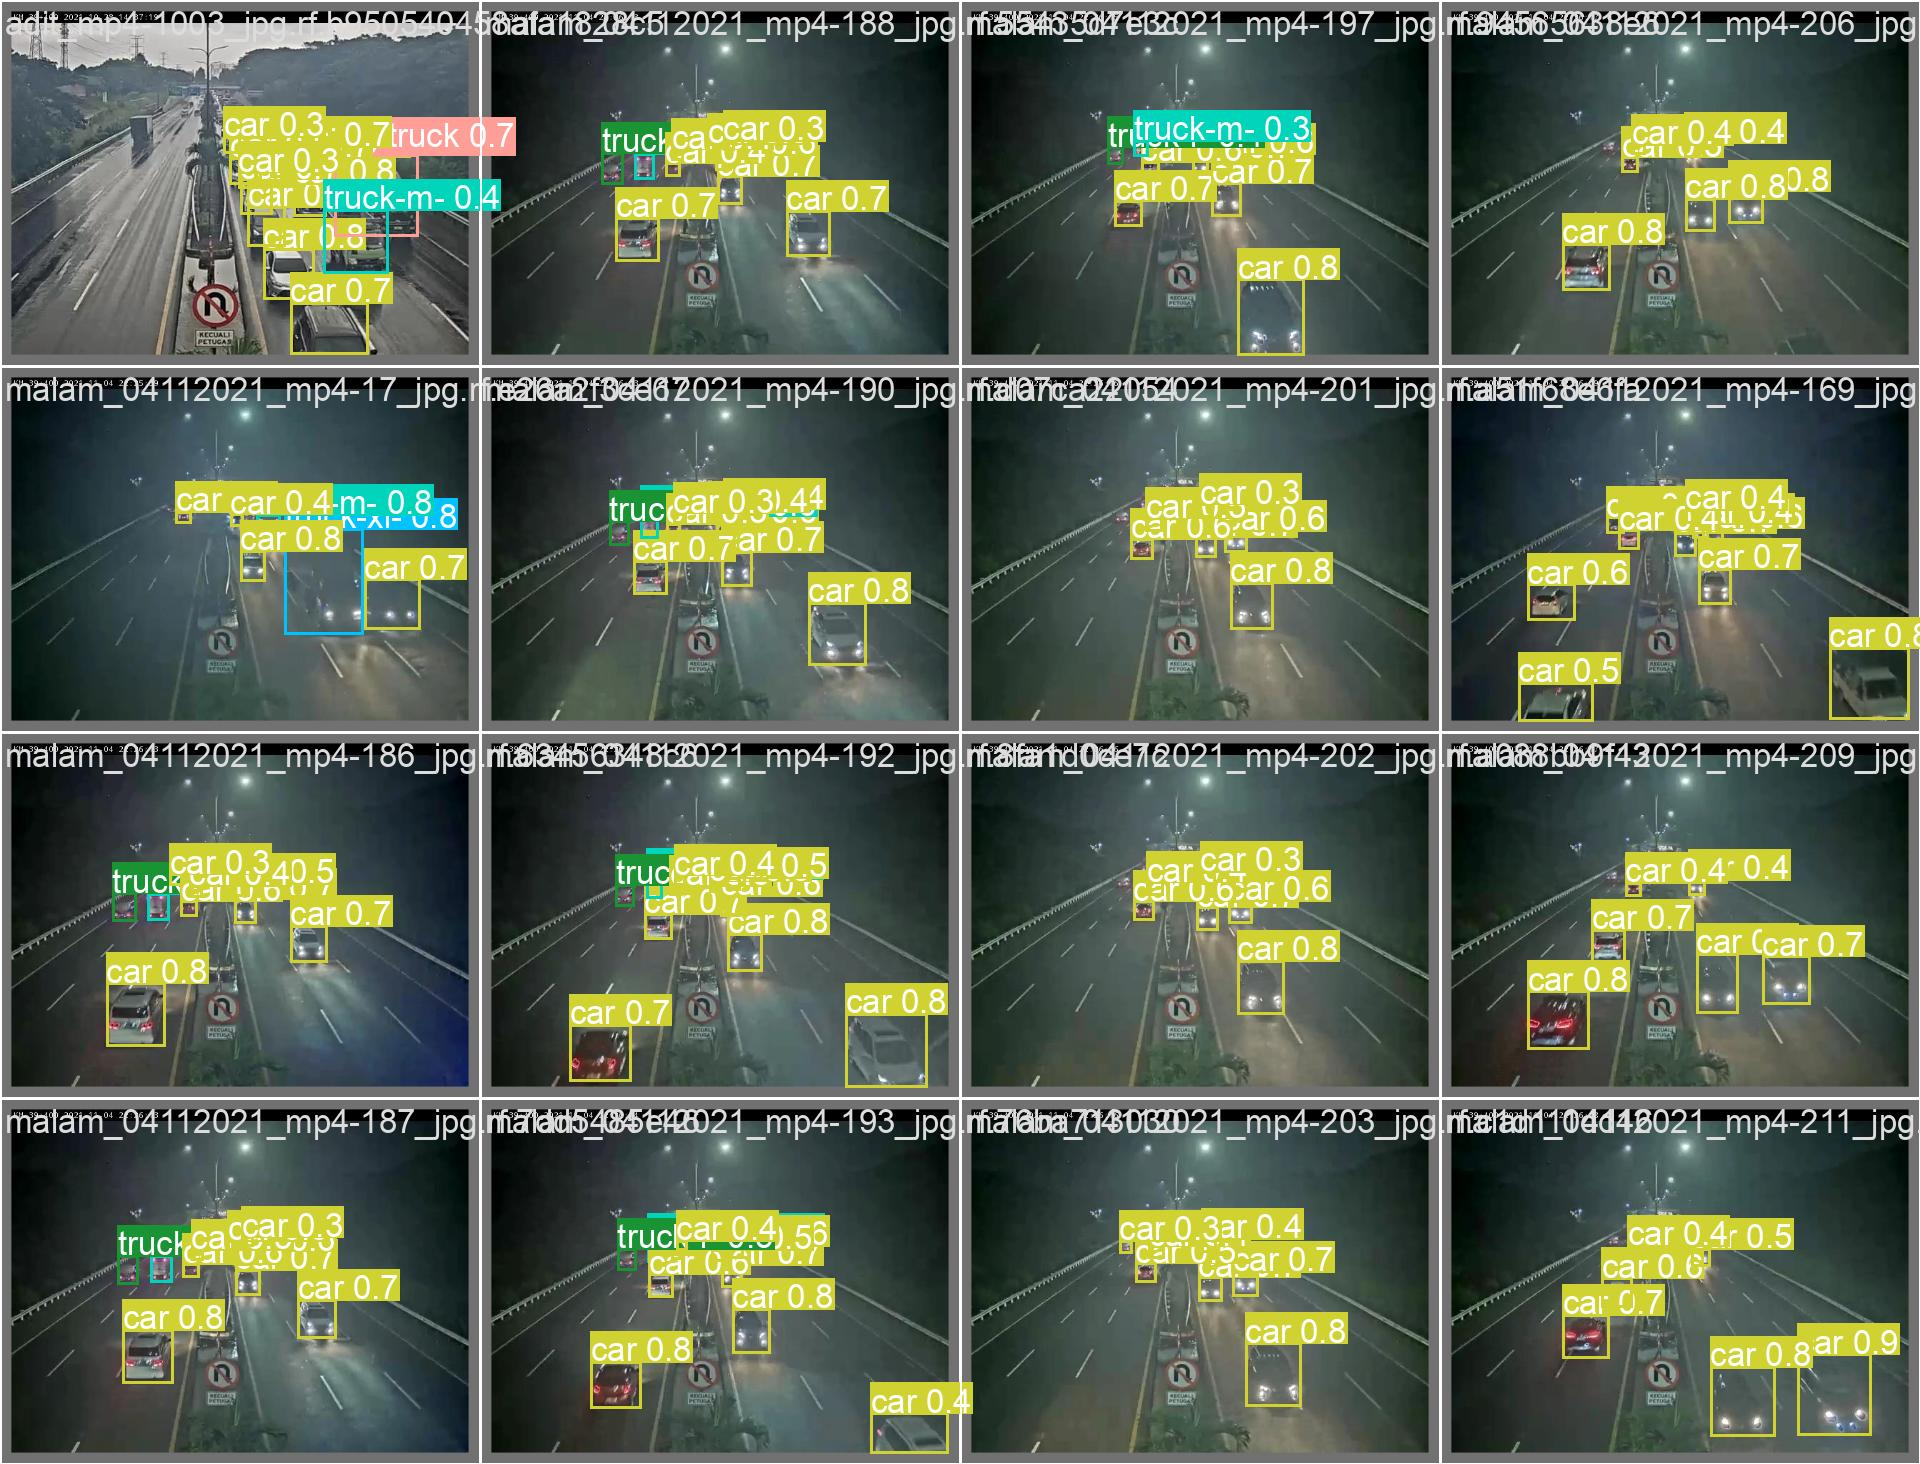

In [18]:
imagen_path = '/content/runs/detect/train/val_batch0_pred.jpg'

# Mostrar la imagen
Image(filename=imagen_path)

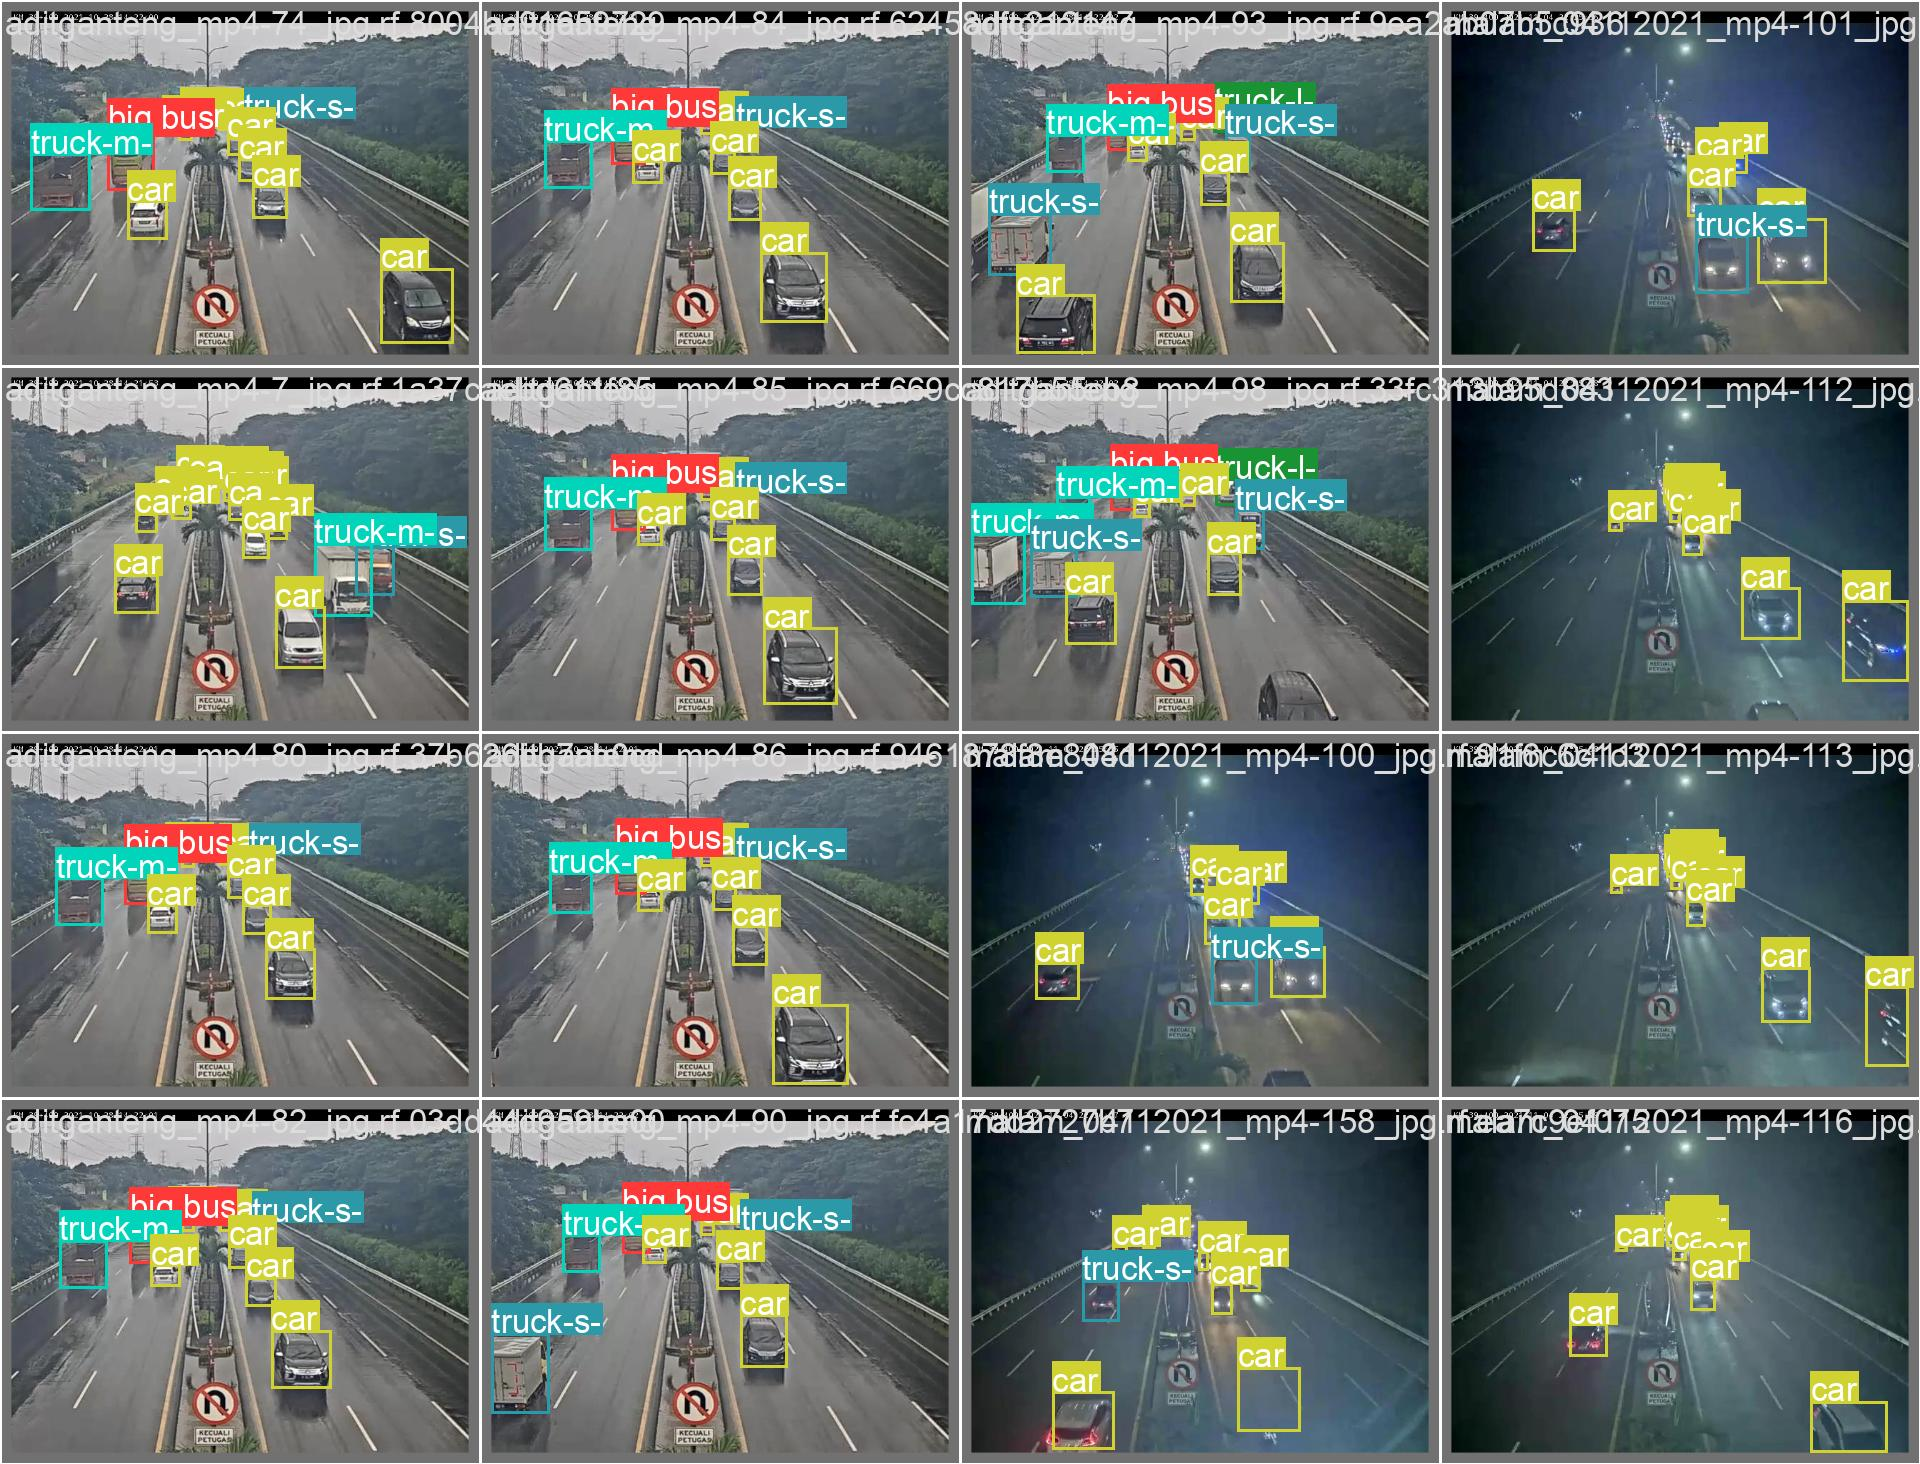

In [21]:
imagen_path = '/content/runs/detect/train/val_batch1_labels.jpg'

# Mostrar la imagen
Image(filename=imagen_path)

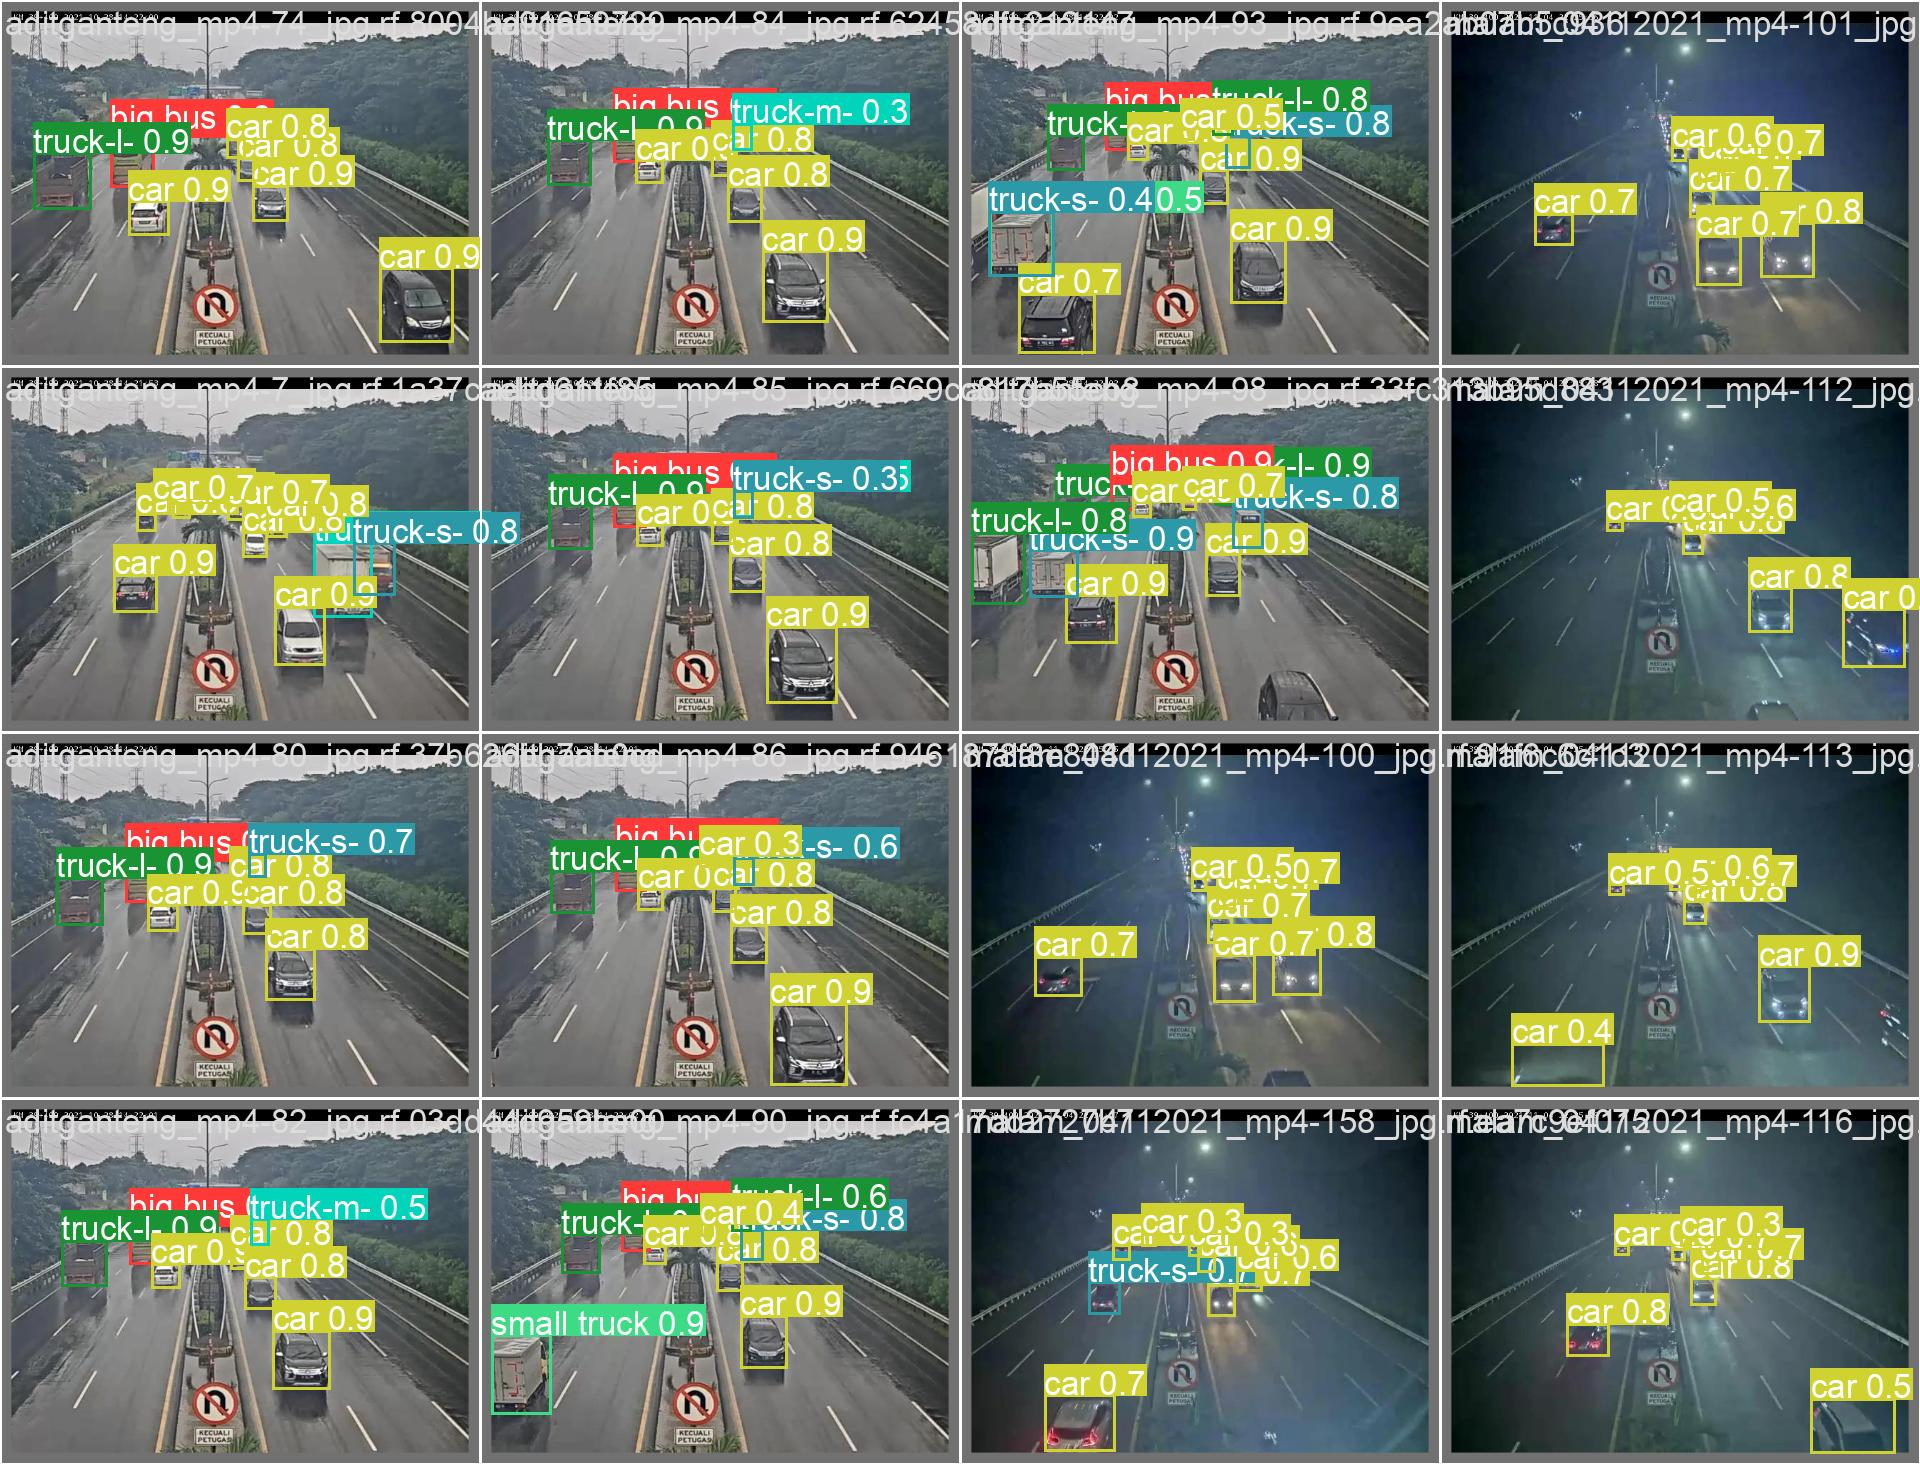

In [20]:
imagen_path = '/content/runs/detect/train/val_batch1_pred.jpg'

# Mostrar la imagen
Image(filename=imagen_path)

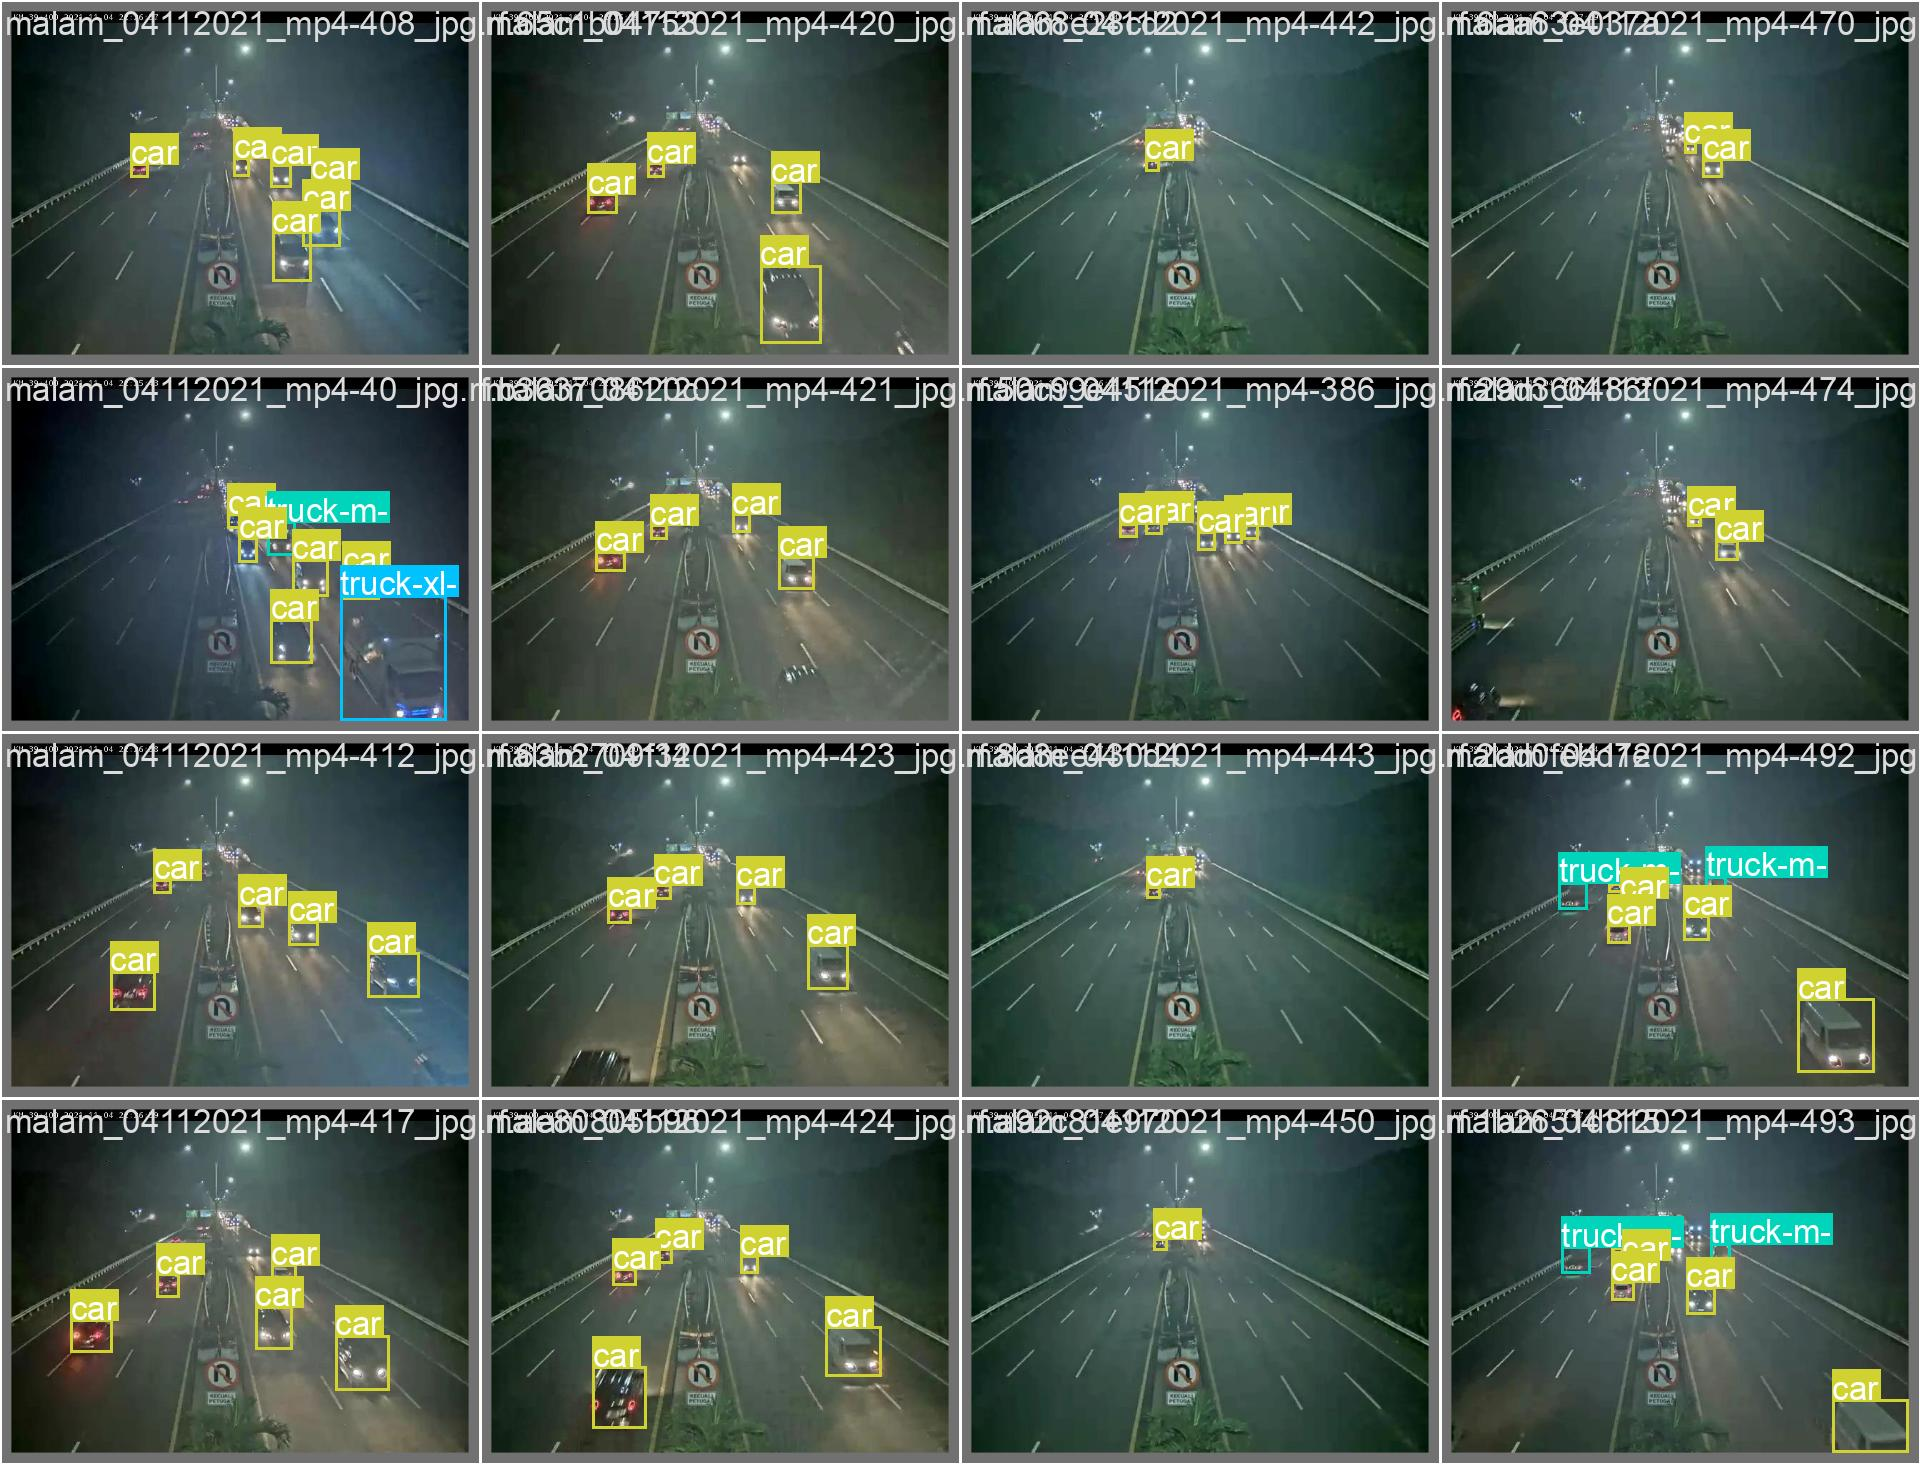

In [23]:
imagen_path = '/content/runs/detect/train/val_batch2_labels.jpg'

# Mostrar la imagen
Image(filename=imagen_path)

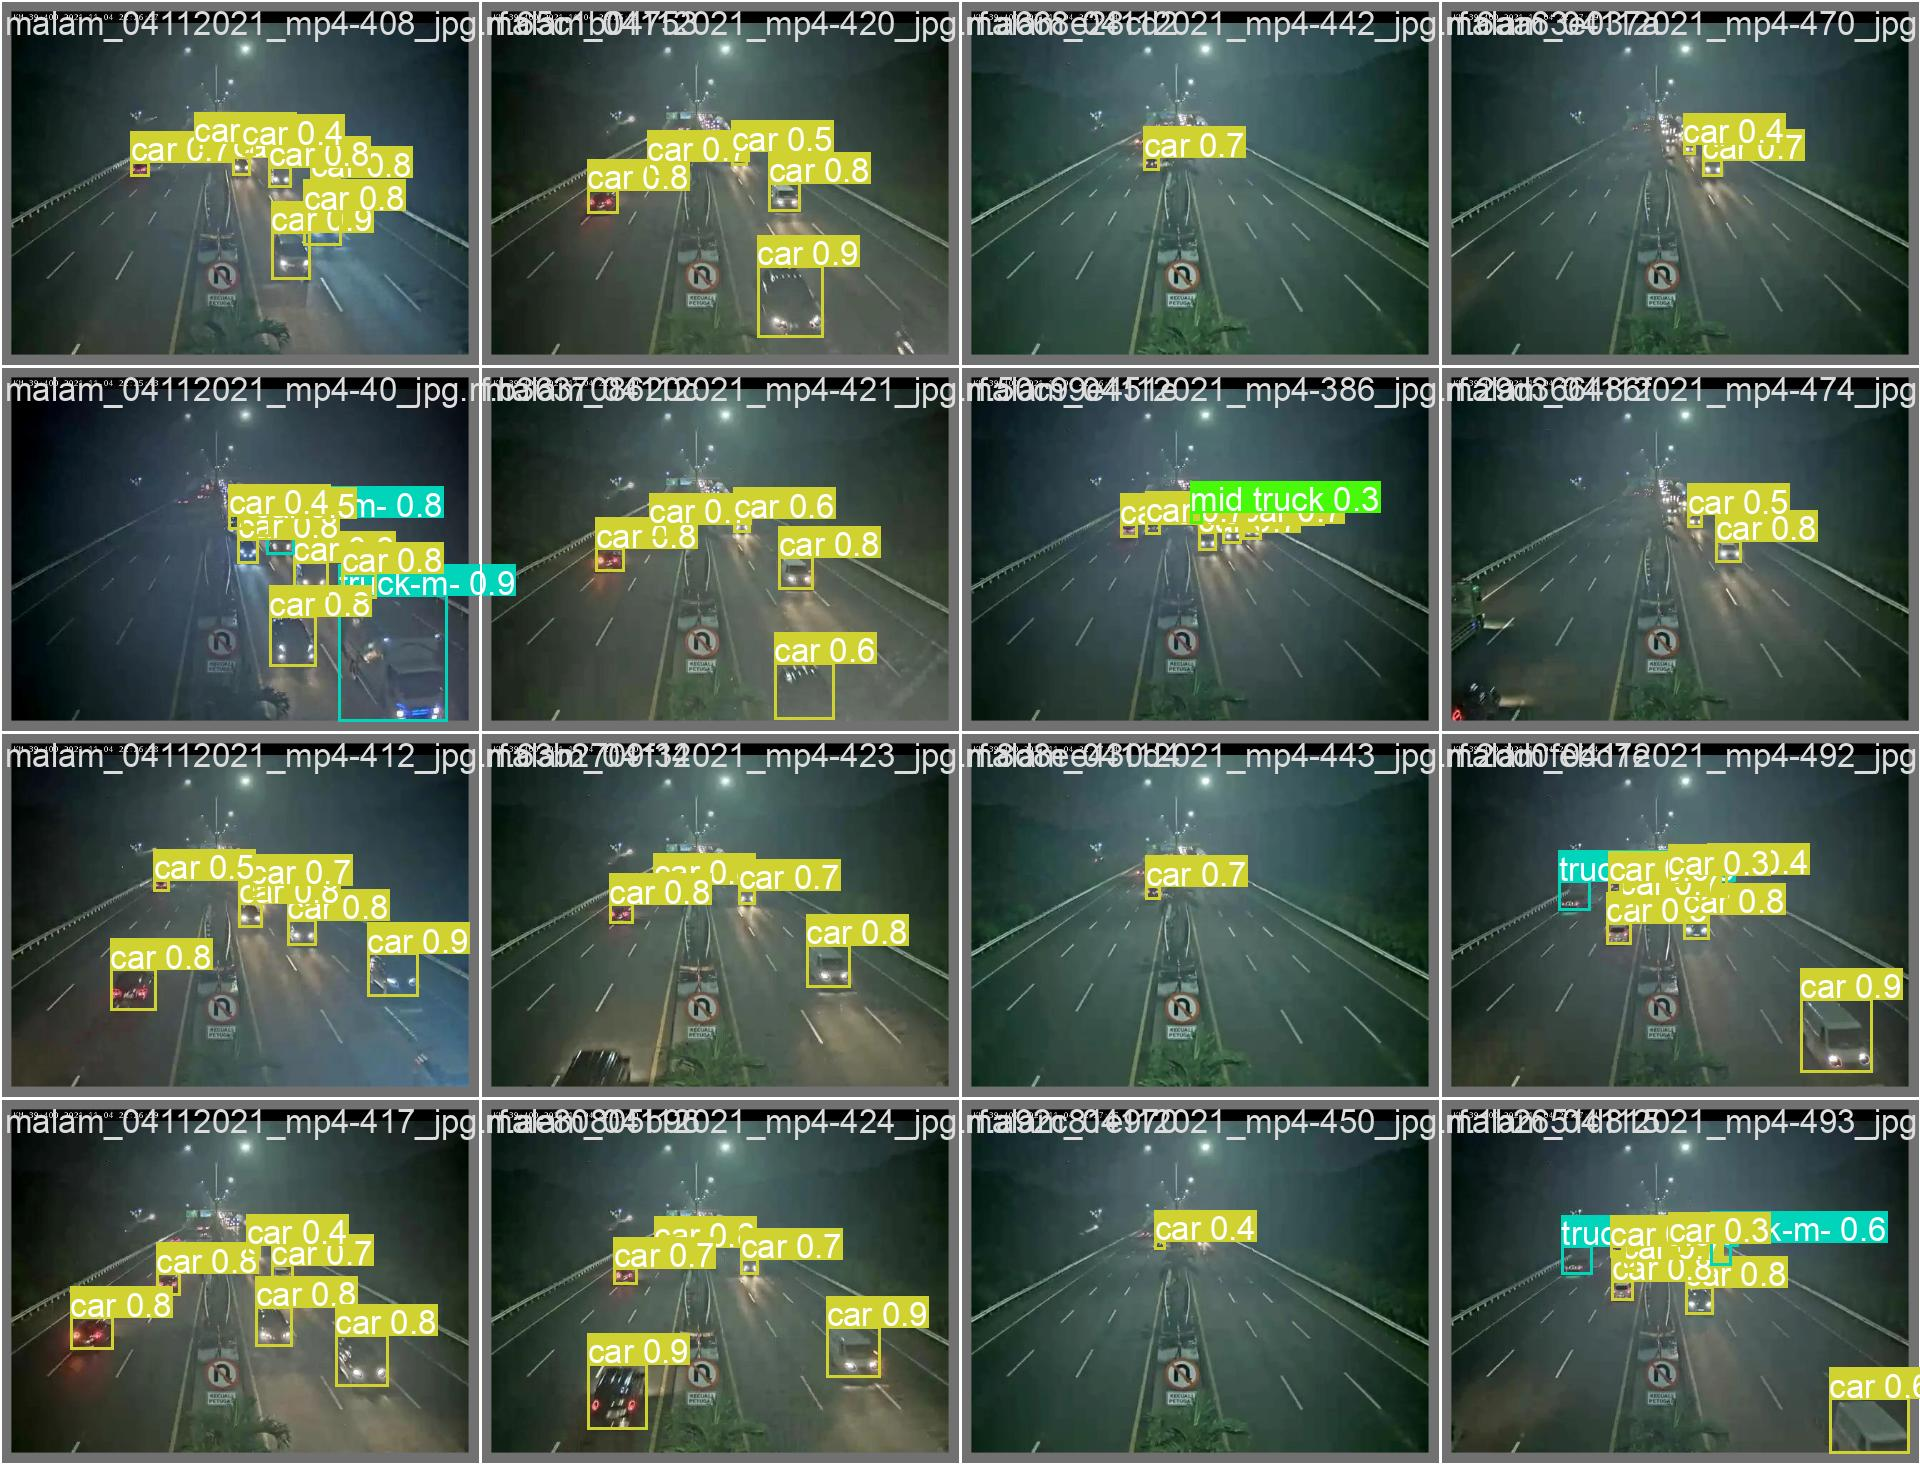

In [22]:
imagen_path = '/content/runs/detect/train/val_batch2_pred.jpg'

# Mostrar la imagen
Image(filename=imagen_path)